# Ski Resort Project
## The test notebook for case 3: Hoch-Ybrigh
## setup 1: 8000 experiments (200 scenarios & 40 Policies)

This notebook is used for the visualization of the "ema_workbench Ski_Resort" project. The outputs of ema_workbench experiments which have been saved after executing the python codes (XLR_Framework.py) are loaded and various visualization techniques are used and maps are produced.

### *Reading the libraries*

Main libraries are imported here, although there a few libraries that are imported later.

In [9]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import ema_workbench
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

### *Seting up the display extent*

In [10]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

## XLR Framework

## Step 5: Model deployment

### Load the outputs

In this section using the load_results class of ema_workbench we load the saved results of python experiments (.tar.gz)

In [11]:
from ema_workbench import load_results, ema_logging
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,
                                                   pairs_density)
ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\CHrandomness_7'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1'

#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\CHrandomness_7'

rootOut = os.path.join(root, 'Results_1')
fh = os.path.join(rootOut, '7500_runs.tar.gz')
experiments, outcomes = load_results(fh)

[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1\Results_1\7500_runs.tar.gz


Check and see if data has been loaded properly or not?

12 parameters:

X2fM, X3iPot, X5temp, X6tempArt, Xfactor1, xClimateModel, xRCP, x1SnowThershold, xGoodDays, scenario, policy, model

In [12]:
print(experiments.shape)
print(list(outcomes.keys()))

(4000, 12)
['y', 'y1', 'y3', 'y4', 'y5', 'y6', 'y7']


#### y: Seasonal average (1981-2100) of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm) 
#### y1: The Climate model which has been used (Should not be presented in the outcomes)
#### y3: Seasonal (1981-2100) number of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)
#### y4: Seasonal average (1981-2100) of number of days with the possibility of Artificial Snow Making (ave TEMP < -2 to -1)
#### y5: Relative seasonal average (1981-2100) of Financial balance of Ski resort
#### y6: Seasonal average (1981-2100) Likelihood of survival of a Ski resort from tipping points
#### y7: Number of tipping points (1981-2100)

## Step 6: Visualization of the EMA_Workbench Results

 the analysis package of ema_workbench contains a wide range of techniques for visualization and analysis of the results from series of computational experiments. 

### Visualization with ema-workbench - part1

### 'Pairwise Scatter Plot'

[MainProcess/DEBUG] generating pairwise scatter plot


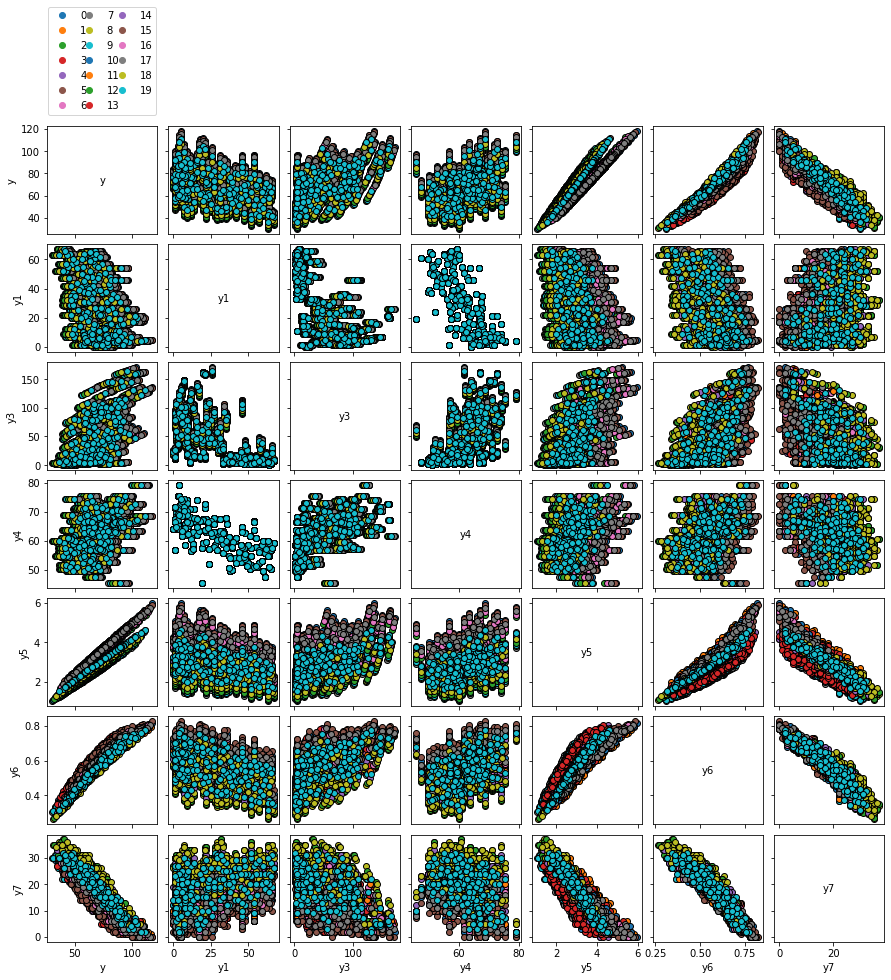

In [13]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15, 15)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs.svg'), format='svg', dpi=600)
plt.show()

### Assign the address of outputs folders

In [17]:
import tarfile

shutil.move(os.path.join(root, 'Outputs_py'), os.path.join(rootOut, 'Outputs_py'))
shutil.move(os.path.join(root, 'outSeason'), os.path.join(rootOut, 'outSeason')) 
shutil.move(os.path.join(root, 'outSeason_Likelihood_survival'), os.path.join(rootOut, 'outSeason_Likelihood_survival')) 
shutil.move(os.path.join(root, 'outSeasonArt'), os.path.join(rootOut, 'outSeasonArt')) 
shutil.move(os.path.join(root, 'outSeasonFinancial'), os.path.join(rootOut, 'outSeasonFinancial')) 

rootVisualization = rootOut
with tarfile.open(os.path.join(rootVisualization, '7500_runs.tar.gz'),"r") as zip_ref:
    zip_ref.extractall(os.path.join(rootVisualization, '7500_runs'))

# We have five types of outputs
outDaily = os.path.join(rootVisualization, 'Outputs_py')
outSeasonTippingPoint = os.path.join(rootVisualization, 'outSeason')
outSeason_Likelihood_survival = os.path.join(rootVisualization, 'outSeason_Likelihood_survival')
outSeasonArtificialSnowPossibility = os.path.join(rootVisualization, 'outSeasonArt')
outSeasonFinancial = os.path.join(rootVisualization, 'outSeasonFinancial')
out_ema = os.path.join(rootVisualization, '7500_runs')

In [18]:
df4_ema_experiment = pd.read_csv(os.path.join(out_ema, 'experiments.csv'))
df4_ema_y = pd.read_csv(os.path.join(out_ema, 'y.csv'), header=None)
df4_ema_y.columns = ["Yout"]
df4_ema_y1 = pd.read_csv(os.path.join(out_ema, 'y1.csv'), header=None)
df4_ema_y1.columns = ["Yout1"]
df4_ema_y3 = pd.read_csv(os.path.join(out_ema, 'y3.csv'), header=None)
df4_ema_y3.columns = ["Yout3" + "_" + str(i) for i in range(118)]
df4_ema_y4 = pd.read_csv(os.path.join(out_ema, 'y4.csv'), header=None)
df4_ema_y4.columns = ["Yout4"]
df4_ema_y5 = pd.read_csv(os.path.join(out_ema, 'y5.csv'), header=None)
df4_ema_y5.columns = ["Yout5"]
df4_ema_y6 = pd.read_csv(os.path.join(out_ema, 'y6.csv'), header=None)
df4_ema_y6.columns = ["Yout6"]
df4_ema_y7 = pd.read_csv(os.path.join(out_ema, 'y7.csv'), header=None)
df4_ema_y7.columns = ["Yout7"]

#### Make a database from the outputs of ema framework by concatinating the every output and experiments table

In [19]:
df_final_ema = pd.concat((df4_ema_experiment, df4_ema_y, df4_ema_y1, df4_ema_y3, df4_ema_y4, df4_ema_y5, df4_ema_y6, df4_ema_y7 ), axis = 1)
df_final_ema.head()

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  xRCP  \
0  1.533510  1090.508728  3.579361  -1.991463  1.245286       0.695789   2.0   
1  1.146203   956.982043  5.311500  -1.887757  2.637302       0.311148   2.0   
2  1.279667   946.927733  3.616109  -1.843542  0.897582       0.164899   3.0   
3  1.113513  1035.334851  4.936210  -1.117866  3.403509       0.797191   3.0   
4  1.343800  1052.327028  5.102862  -1.556209  0.625328       0.925122   1.0   

   x1SnowThershold  xGoodDays  scenario  policy     model       Yout  Yout1  \
0       273.718453  73.866108         0       0  UZHModel  43.710822     28   
1       273.718453  73.866108         1       0  UZHModel  73.010866     19   
2       273.718453  73.866108         2       0  UZHModel  50.355349     41   
3       273.718453  73.866108         3       0  UZHModel  58.609579     61   
4       273.718453  73.866108         4       0  UZHModel  79.223257     10   

      Yout3_0     Yout3_1     Yout3_2     Yout3_3     Yout3_4     Yout3_5  \
0   42.481718  103.657178   40.377548   82.912339  131.092113   65.653045   
1  106.839351   83.243091  114.203763  124.567958   59.447143   32.638793   
2   40.198861   70.472706  145.301058   54.049626   74.764518   43.881842   
3   93.220883  128.583123   88.001023  113.186643  129.761879  129.390502   
4   40.933338  102.794897  158.107506   56.909682   69.207172   61.957496   

      Yout3_6     Yout3_7     Yout3_8     Yout3_9    Yout3_10    Yout3_11  \
0   42.283521   31.821749   36.054566   39.315143   82.136464   83.045077   
1  161.449359  120.953829   59.773245  127.230252  105.956515   98.976415   
2  129.804117   91.089474   90.327722  116.339827   48.656043  137.996572   
3   28.236021  106.108009   99.727786   35.665443   66.905584  138.181108   
4  132.174453   57.615772  144.251493   88.088839   51.371537  120.932150   

     Yout3_12    Yout3_13    Yout3_14    Yout3_15    Yout3_16    Yout3_17  \
0   87.091674  137.168984   39.914664    7.630432   62.029332  115.463990   
1  109.963435  150.180366  115.770785   76.615874  109.624798  100.759893   
2   69.832084  122.840901   86.302869  124.934429   94.429705   43.886044   
3  111.584592  126.137279   46.116876  102.029316  105.740338  102.644365   
4   87.745698  123.651509   63.349949  113.328923  108.469203   92.412473   

    Yout3_18    Yout3_19  ...   Yout3_88   Yout3_89   Yout3_90   Yout3_91  \
0  27.130323   48.456141  ...  11.727306  12.559950  14.157138  10.776219   
1  90.874295   10.101438  ...  60.136830  50.721105  12.412170  71.402968   
2  23.576598   25.700934  ...  33.948789  31.704549  10.731794  17.460752   
3  60.249500   72.163056  ...  12.149784  30.100528  42.121822  39.155490   
4  26.329902  102.082321  ...  95.789304  16.711734  80.719841  90.068462   

    Yout3_92    Yout3_93   Yout3_94    Yout3_95   Yout3_96   Yout3_97  \
0  56.972376   30.940442   6.349773   69.608351   9.712023  33.187569   
1  65.363660  102.115190  55.705898  125.289591  89.312147  24.408402   
2   7.229509   71.229993  16.354579   10.470248   4.001411  33.805576   
3  16.017627   53.460177  36.330689   57.030974   7.801995  62.804711   
4  20.239154  126.413196  62.199826  139.421571  95.198680  71.104158   

    Yout3_98   Yout3_99  Yout3_100   Yout3_101  Yout3_102  Yout3_103  \
0  30.784479  54.523178  29.114369   38.227529  28.853298  53.419636   
1  38.492144  38.782588  84.022451   14.021853  17.653030  29.717142   
2  11.680433  13.912909  28.808288   19.262567  14.212962  15.271751   
3   3.790355   6.091442  32.592468   33.120748   9.086052   9.013313   
4  38.001968  82.311075  48.054524  121.382851  90.921711  95.965627   

    Yout3_104  Yout3_105  Yout3_106  Yout3_107   Yout3_108  Yout3_109  \
0   43.421369   9.707384  23.782649  16.564904   95.506201  64.040184   
1    5.466456  64.669828  19.329460   5.518335   75.531954  34.518499   
2    1.961066   8.557918   8.202918  12.161292   29.579993  19.887698   
3   50.964412   2.745960  25.396461

In [20]:
# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values

YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3_95'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values
y7 = df_final_ema['Yout7'].values

In [21]:
outFolder = rootVisualization
outSeasonFolder = os.path.join(outFolder, 'outSeason')
outSeasonFinancial = os.path.join(outFolder, 'outSeasonFinancial')
outSeasonArt = os.path.join(outFolder, 'outSeasonArt')
outSeason_Likelihood_survival = os.path.join(outFolder, 'outSeason_Likelihood_survival')

In [22]:
#### 2020/07/22 ####
all_Files = []
for filename in os.walk(outSeasonFolder):
    all_Files = filename[2]
    
totalFiles_loc = []
for i in range(len(all_Files)):
    totalFiles_loc.append(os.path.join(outSeasonFolder, all_Files[i]))
    
### 2020/08/23
all_Files_fin = []
for filename in os.walk(outSeasonFinancial):
    all_Files_fin = filename[2]
    
totalFiles_loc_fin = []
for i in range(len(all_Files_fin)):
    totalFiles_loc_fin.append(os.path.join(outSeasonFinancial, all_Files_fin[i]))
    
### 2020/08/23
all_Files_Art = []
for filename in os.walk(outSeasonArt):
    all_Files_Art = filename[2]
    
totalFiles_loc_Art = []
for i in range(len(all_Files_Art)):
    totalFiles_loc_Art.append(os.path.join(outSeasonArt, all_Files_Art[i]))

### 2020/08/23
all_Files_Like = []
for filename in os.walk(outSeason_Likelihood_survival):
    all_Files_Like = filename[2]
    
totalFiles_loc_Like = []
for i in range(len(all_Files_Like)):
    totalFiles_loc_Like.append(os.path.join(outSeason_Likelihood_survival, all_Files_Like[i]))


#### Total number of outputs (csv files) in each out folder produced by our framework

In [23]:
print(len(totalFiles_loc))
print(len(totalFiles_loc_fin))
print(len(totalFiles_loc_Art))
print(len(totalFiles_loc_Like))

4000
4000
4000
4000


In [24]:
emptyMatrixGoodDays = [np.empty([119, 69]) for _ in range(len(totalFiles_loc))]
    
for i in range(0, len(totalFiles_loc), 1):
    b = []
    with open(totalFiles_loc[i], 'r') as file:
        outputReaderlines = file.readlines()
        for j in range (len(outputReaderlines)):
            b.append(outputReaderlines[j].replace('\n','').split(','))
    
    emptyMatrixGoodDays[i] = np.array(b)

### 2020/08/23
emptyMatrixfin = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_fin))]

for i in range(0, len(totalFiles_loc_fin), 1):
    b = []
    with open(totalFiles_loc_fin[i], 'r') as file:
        outputReaderlines_fin = file.readlines()
        for j in range (len(outputReaderlines_fin)):
            b.append(outputReaderlines_fin[j].replace('\n','').split(','))
    
    emptyMatrixfin[i] = np.array(b)

### 2020/08/23
emptyMatrixArt = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Art))]

for i in range(0, len(totalFiles_loc_Art), 1):
    b = []
    with open(totalFiles_loc_Art[i], 'r') as file:
        outputReaderlines_Art = file.readlines()
        for j in range (len(outputReaderlines_Art)):
            b.append(outputReaderlines_Art[j].replace('\n','').split(','))
    
    emptyMatrixArt[i] = np.array(b)
    
### 2020/08/23
emptyMatrixLike = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Like))]

for i in range(0, len(totalFiles_loc_Like), 1):
    b = []
    with open(totalFiles_loc_Like[i], 'r') as file:
        outputReaderlines_Like = file.readlines()
        for j in range (len(outputReaderlines_Like)):
            b.append(outputReaderlines_Like[j].replace('\n','').split(','))
    
    emptyMatrixLike[i] = np.array(b)

In [25]:
#matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=2)
matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=0)
matrix_fin = np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1)), axis=0)
matrix_Art = np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1)), axis=0)
matrix_Like = np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1)), axis=0)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [26]:
print(matrix_GoodDays.shape)
print(matrix_fin.shape)
print(matrix_Art.shape)
print(matrix_Like.shape)

(4000, 119, 2)
(4000, 119, 2)
(4000, 119, 2)
(4000, 119, 2)


#### Check the header of outputs

In [27]:
print(emptyMatrixGoodDays[1][0,1])
print(emptyMatrixfin[1][0,1])
print(emptyMatrixArt[1][0,1])
print(emptyMatrixLike[1][0,1])

isOverSnow_sc_Ver2_45_8
Money_sc_Ver2_45_8
ArtSnowPossibility_sc_Ver2_45_8
isOverSnow_sc_Ver2_45_8


In [28]:
matrix_GoodDays26= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP26' in emptyMatrixGoodDays[i][0,1] or \
                             '_26_' in emptyMatrixGoodDays[i][0,1] ) , axis=0) 
matrix_GoodDays45= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP45' in emptyMatrixGoodDays[i][0,1] or \
                            '_45_' in emptyMatrixGoodDays[i][0,1] ), axis=0)
matrix_GoodDays85= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP85' in emptyMatrixGoodDays[i][0,1] or \
                            '_85_' in emptyMatrixGoodDays[i][0,1]), axis=0) 

### 2020/08/23
matrix_fin26= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP26' in emptyMatrixfin[i][0,1] or \
                             '_26_' in emptyMatrixfin[i][0,1] ) , axis=0) 
matrix_fin45= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP45' in emptyMatrixfin[i][0,1] or \
                            '_45_' in emptyMatrixfin[i][0,1] ), axis=0)
matrix_fin85= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP85' in emptyMatrixfin[i][0,1] or \
                            '_85_' in emptyMatrixfin[i][0,1]), axis=0) 

### 2020/08/23
matrix_Art26= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP26' in emptyMatrixArt[i][0,1] or \
                             '_26_' in emptyMatrixArt[i][0,1] ) , axis=0) 
matrix_Art45= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP45' in emptyMatrixArt[i][0,1] or \
                            '_45_' in emptyMatrixArt[i][0,1] ), axis=0)
matrix_Art85= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP85' in emptyMatrixArt[i][0,1] or \
                            '_85_' in emptyMatrixArt[i][0,1]), axis=0) 

### 2020/08/23
matrix_Like26= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP26' in emptyMatrixLike[i][0,1] or \
                             '_26_' in emptyMatrixLike[i][0,1] ) , axis=0) 
matrix_Like45= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP45' in emptyMatrixLike[i][0,1] or \
                            '_45_' in emptyMatrixLike[i][0,1] ), axis=0)
matrix_Like85= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP85' in emptyMatrixLike[i][0,1] or \
                            '_85_' in emptyMatrixLike[i][0,1]), axis=0) 

In [29]:
print(type(matrix_GoodDays))
print(matrix_GoodDays.ndim)
print(len(matrix_GoodDays))
print(matrix_GoodDays.size)
print(matrix_GoodDays.dtype)
print(matrix_GoodDays.dtype.name)
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
print(matrix_Art26.shape)
print(matrix_Art45.shape)
print(matrix_Art85.shape)
print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

<class 'numpy.ndarray'>
3
4000
952000
<U47
str1504
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000


In [30]:
print(matrix_GoodDays[2, 1:, 1:2].shape)
print(matrix_fin[2, 1:, 1:2].shape)
print(matrix_Art[2, 1:, 1:2].shape)
print(matrix_Like[2, 1:, 1:2].shape)

(118, 1)
(118, 1)
(118, 1)
(118, 1)


### Calculate the quantiles for each year of simulation (1981-2100)

In [31]:
q10_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.9, axis=0)


In [32]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

print(q10_years_Art[0])
print(q25_years_Art[0])
print(q50_years_Art[0])
print(q75_years_Art[0])
print(q90_years_Art[0])
print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[29.73247029]
[49.69416362]
[72.30591962]
[93.32261471]
[110.67847412]
(118, 1)
[1.19]
[2.03]
[3.03]
[4.1]
[5.041]
(118, 1)
[53.074]
[57.6225]
[64.66]
[74.4875]
[83.116]
(118, 1)
[34.71450802]
[58.43848017]
[85.50714886]
[100.]
[100.]
(118, 1)


In [33]:
num_Simulation = 16
p_Step = 1
alpha_Fade = 0.31

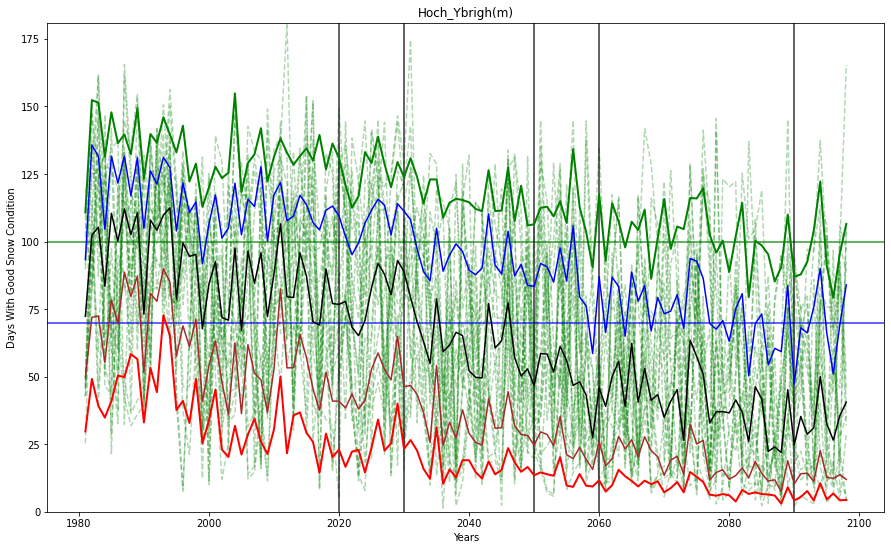

In [34]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_GoodDays[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=70, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =181)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_number_of_day_goodSnow.svg'), format='svg', dpi=300)

plt.show()

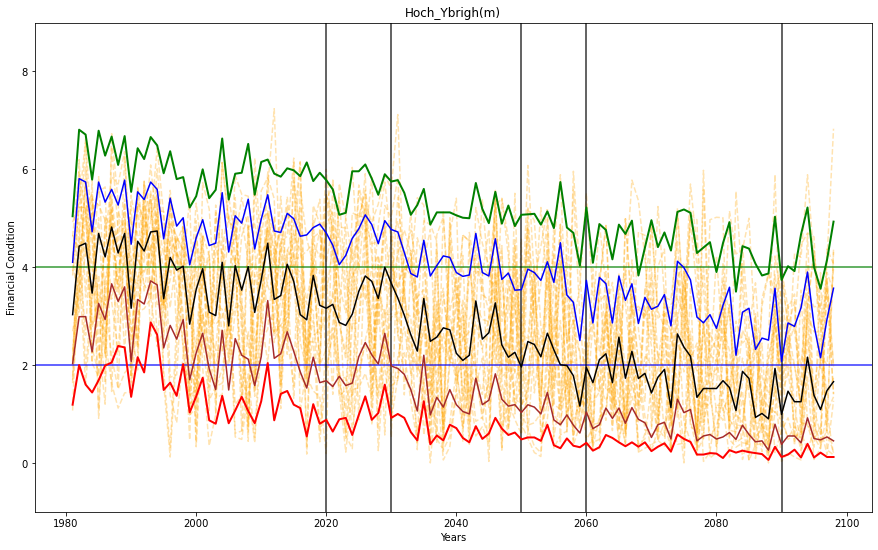

In [35]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_fin[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=4, color='green', alpha=0.8)
axs.axhline(y=2, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_fin, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_fin, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_fin, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_fin, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_fin, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =9)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Financial Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_Financial.svg'), format='svg', dpi=300)

plt.show()

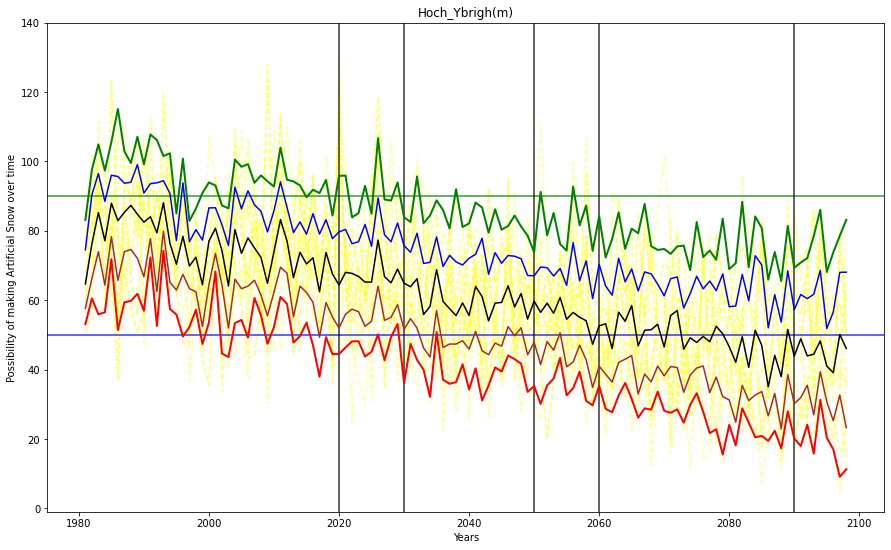

In [36]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_Art[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='yellow', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Art, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Art, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Art, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Art, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Art, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =140)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Possibility of making Artificial Snow over time')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_ArtSnow.svg'), format='svg', dpi=300)

plt.show()

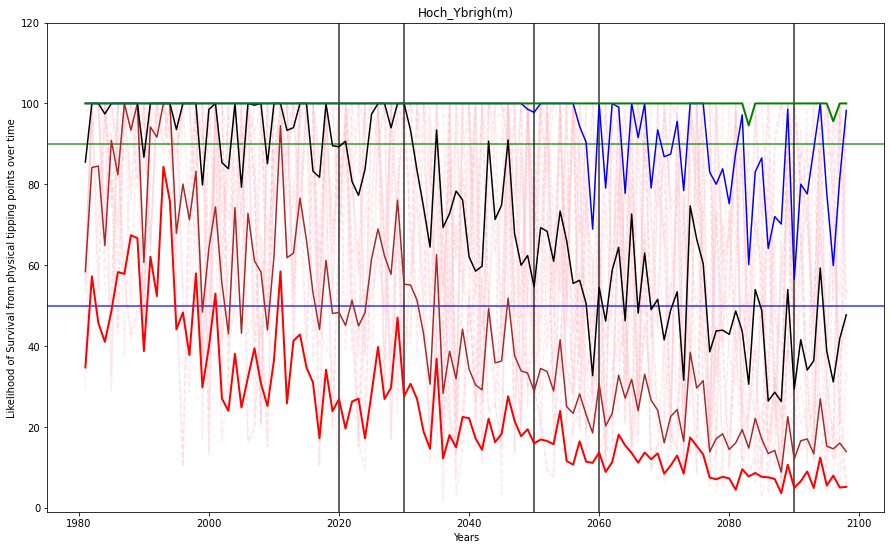

In [37]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_Like[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Like, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Like, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Like, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Like, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Like, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =120)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Likelihood of Survival from physical tipping points over time')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_Likelihood.svg'), format='svg', dpi=300)

plt.show()

### Visualization with ema-workbench - part2 

## Scenario Discovery 
### A model driven approach to scenario development

There is ample literature on both CART and PRIM and their relative merits for use in scenario discovery.

In [40]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['y'] < 80
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 3102 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.2325, coverage: 0.29980657640232106, density: 1.0 restricted_dimensions: 3


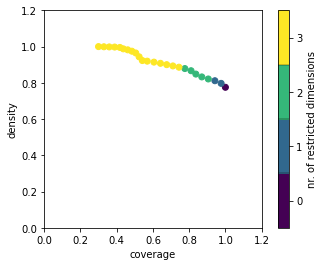

In [41]:
#import mpld3
box1.show_tradeoff()
plt.show()
#mpld3.display()
fig.savefig(os.path.join(rootVisualization, 'box.svg'), format='svg', dpi=600)

coverage    0.417795
density     0.995392
id                20
mass          0.3255
mean        0.995392
res_dim            3
Name: 20, dtype: object

                     box 20                                            
                        min         max                       qp values
X5temp             3.005217    5.140599   [-1.0, 2.031828060548913e-34]
Xfactor1           1.578562    3.481211  [2.4777900967074282e-48, -1.0]
x1SnowThershold  230.959953  298.345880   [1.232419515429228e-10, -1.0]



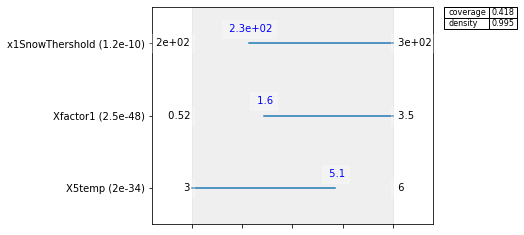

In [44]:
# Saeed : explore the inspect effect
box1.inspect(20)
box1.inspect(20, style='graph')
plt.show()

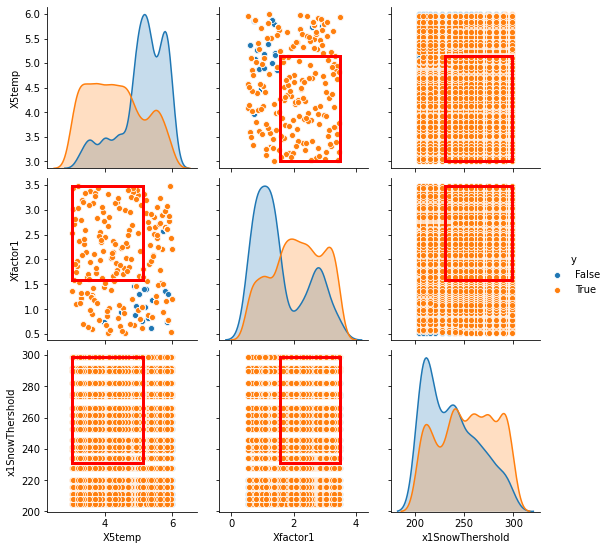

In [45]:
# fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(20)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays.svg'), format='svg', dpi=600)

In [46]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 3070 points remaining, containing 2172 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProce

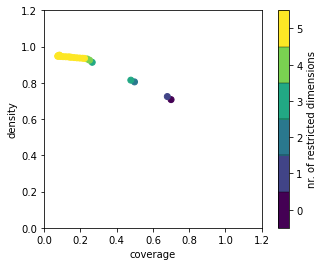

In [47]:
#import mpld3
box2.show_tradeoff()
plt.show()
#mpld3.display()
fig.savefig(os.path.join(rootVisualization, 'box2.svg'), format='svg', dpi=600)

### likelihood of survival analysis

In [48]:
x = experiments
y = outcomes['y6'] < 0.6
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 2353 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting xGoodDays
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.128, coverage: 0.2175945601359966, density: 1.0 restricted_dimensions: 7


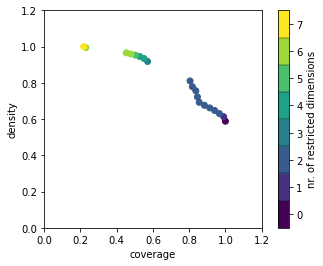

In [49]:
box1.show_tradeoff()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'box_liklihood.svg'), format='svg', dpi=600)

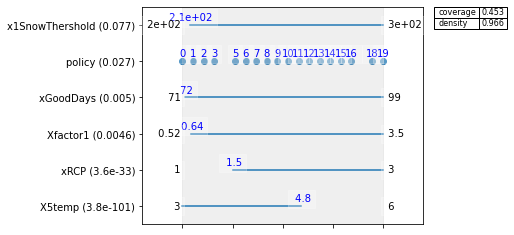

In [54]:
# Saeed : explore the inspect effect
box1.inspect(16, style='graph')
plt.show()

policy [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 4]


C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


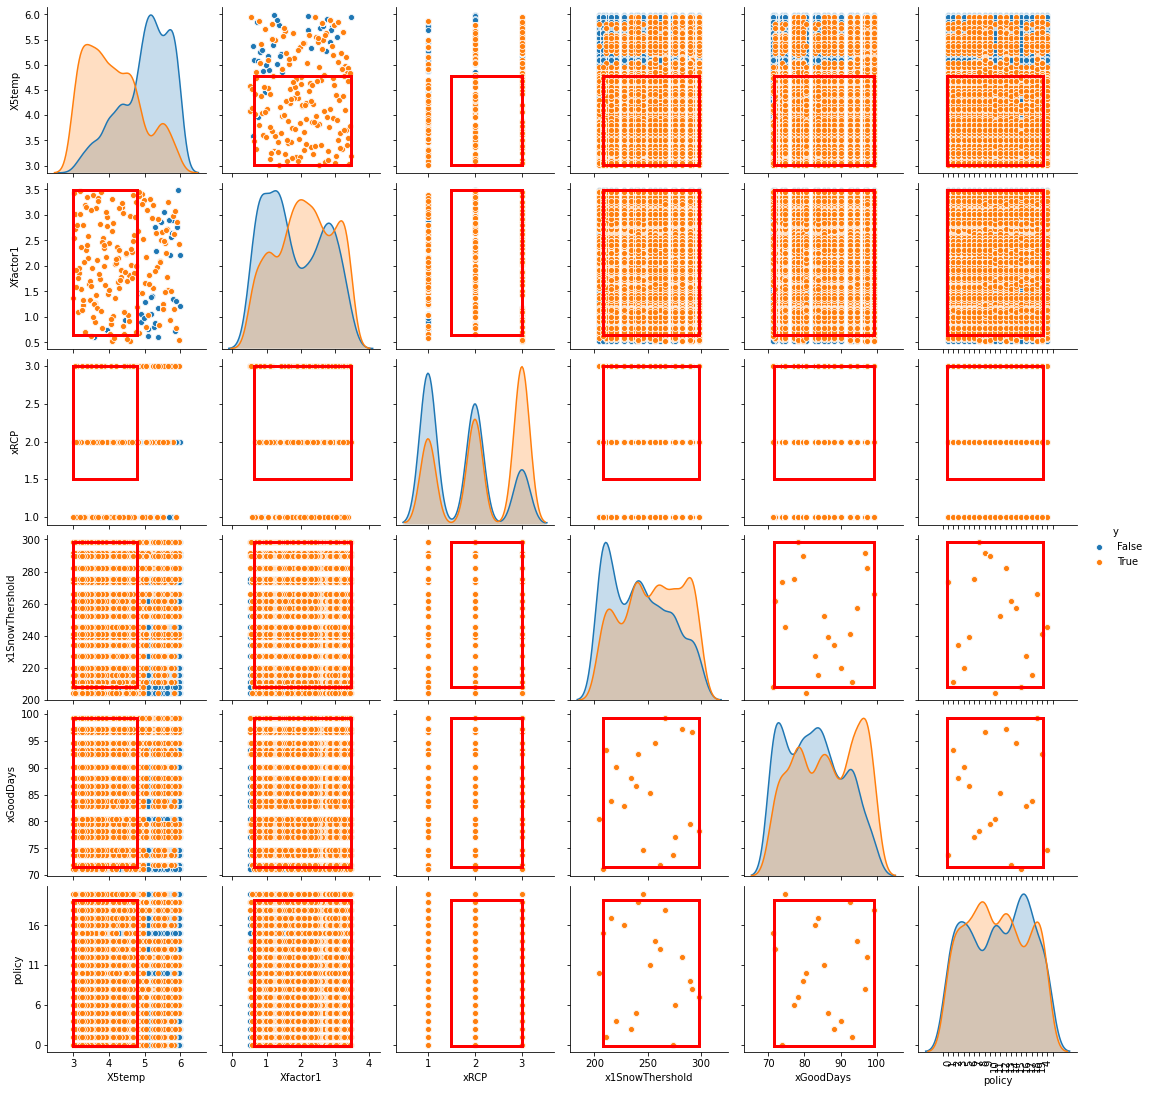

In [56]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(15)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_likehood.svg'), format='svg', dpi=600)

### Artifical snow analysis

In [57]:
x = experiments
y = outcomes['y4'] < 60
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 1440 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 0.94, mass: 0.25, coverage: 0.

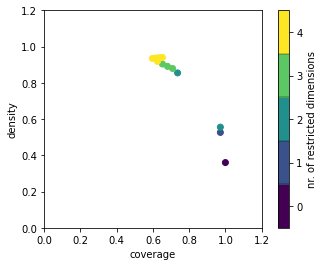

In [58]:
box1.show_tradeoff()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'box_Artificial.svg'), format='svg', dpi=600)

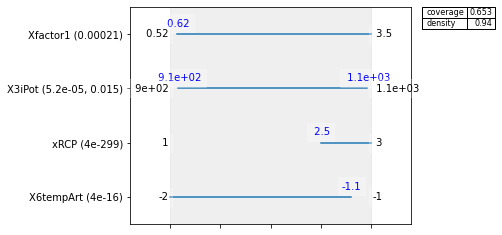

In [61]:
# Saeed : explore the inspect effect
box1.inspect(12, style='graph')
plt.show()

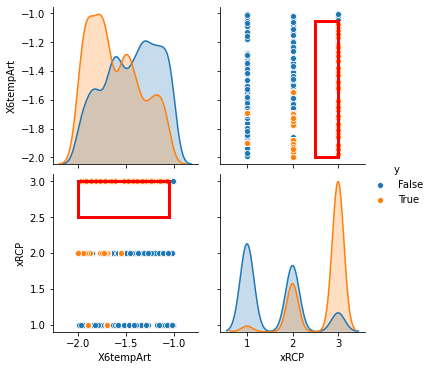

In [62]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_Artificial.svg'), format='svg', dpi=600)

### Tipping points analysis

In [63]:
x = experiments
y = outcomes['y7'] < 20
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 2401 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.119, coverage: 0.19825072886297376, density: 1.0 restricted_dimensions: 5


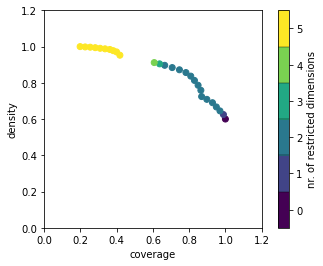

In [64]:
box1.show_tradeoff()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'box_Artificial.svg'), format='svg', dpi=600)

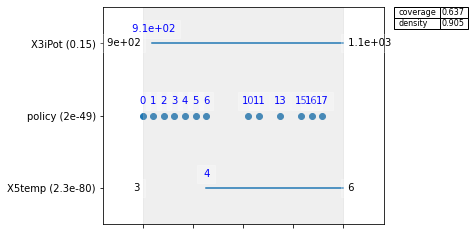

In [66]:
# Saeed : explore the inspect effect
box1.inspect(15, style='graph')
plt.show()

policy [0, 1, 2, 3, 4, 5, 6, 10, 11, 13, 15, 16, 17, 7, 8, 9, 12, 14, 18, 19]


C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


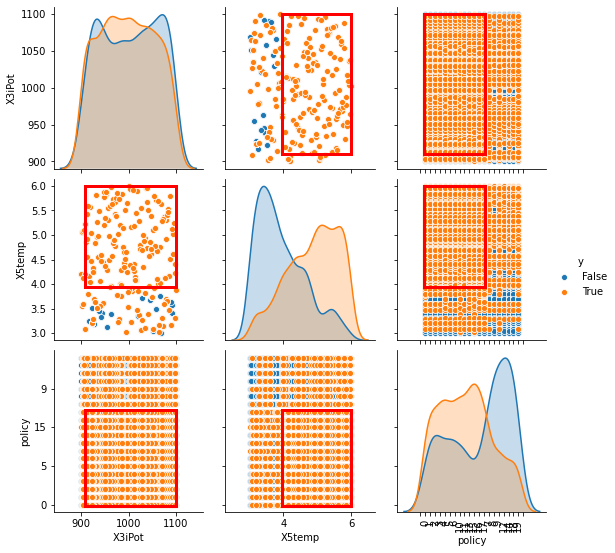

In [68]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(15)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_Artificial.svg'), format='svg', dpi=600)

### Visualization with ema-workbench - part3

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


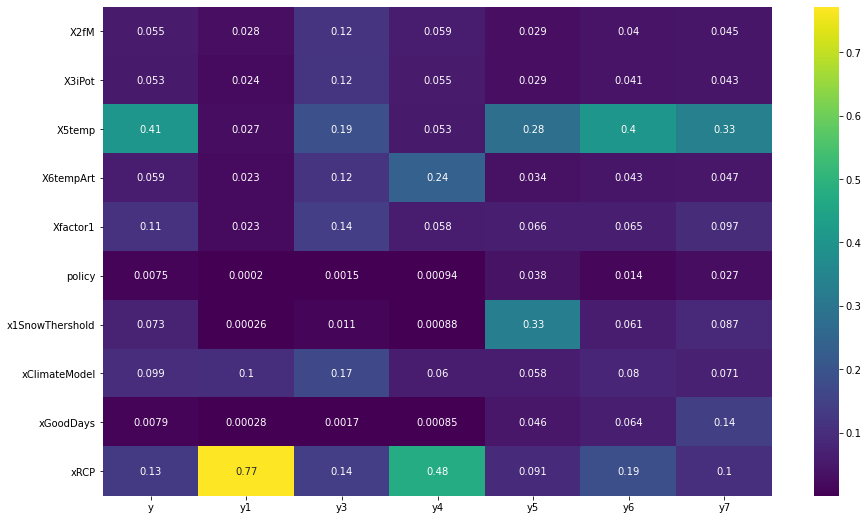

In [69]:
from ema_workbench.analysis import feature_scoring

fig, ax = plt.subplots(figsize=(15,9))

x = experiments
Y = outcomes

fs = feature_scoring.get_feature_scores_all(x, Y)
ax = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

fig.savefig(os.path.join(rootVisualization, 'matrix_importance.svg'), format='svg', dpi=600)

In [70]:
x = experiments
Y = outcomes['y'] < 70
#fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.CLASSIFICATION)
fs, alg = feature_scoring.get_ex_feature_scores(x, Y)

fs.sort_values(ascending=False, by=1)

[MainProcess/INFO] model dropped from analysis because only a single category


1
0                        
X5temp           0.357138
Xfactor1         0.126293
xRCP             0.106503
xClimateModel    0.097480
x1SnowThershold  0.084624
X2fM             0.067765
X6tempArt        0.065376
X3iPot           0.065042
xGoodDays        0.015391
policy           0.014390

[MainProcess/INFO] model dropped from analysis because only a single category


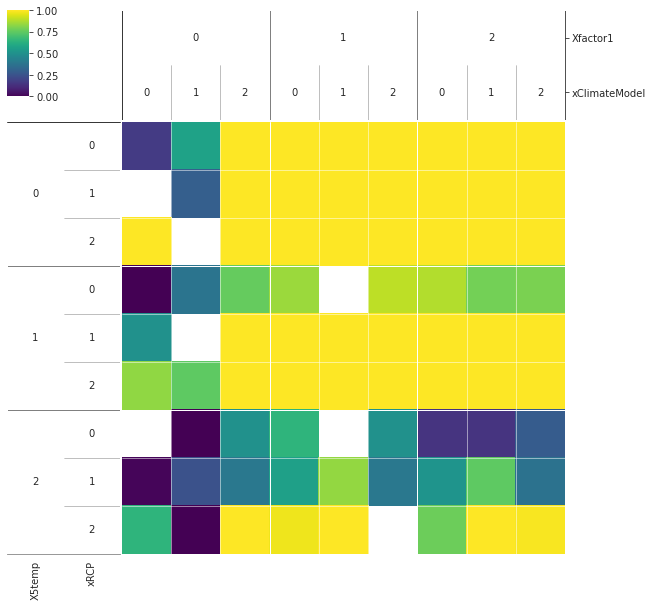

In [71]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y'] < 80
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_gooddays.svg'), format='svg', dpi=600)

[MainProcess/INFO] model dropped from analysis because only a single category


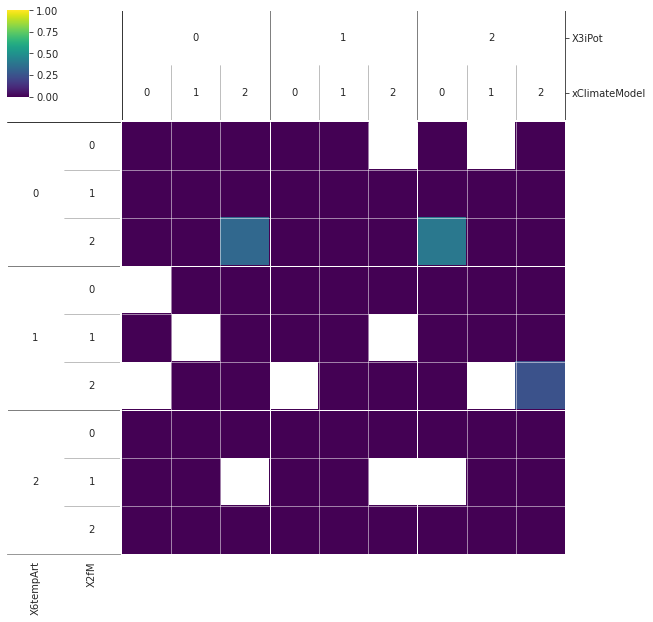

In [78]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y4'] < 50
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Artificial.svg'), format='svg', dpi=600)

[MainProcess/INFO] model dropped from analysis because only a single category


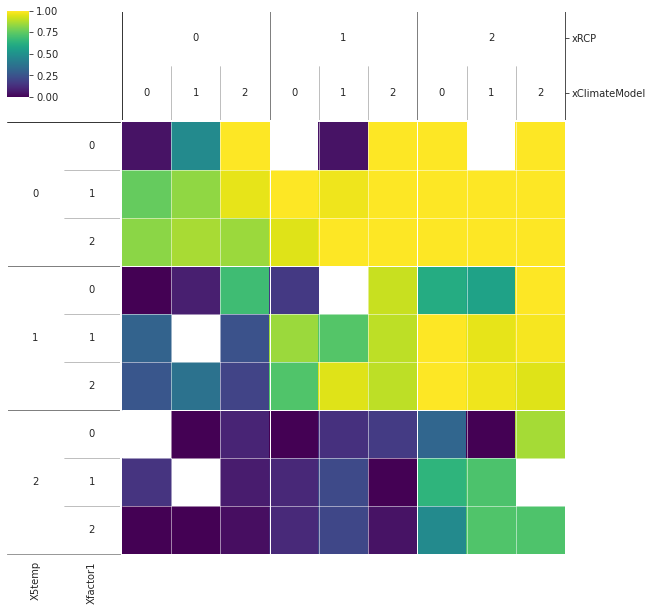

In [79]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y6'] < 0.6
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Liklehood.svg'), format='svg', dpi=600)

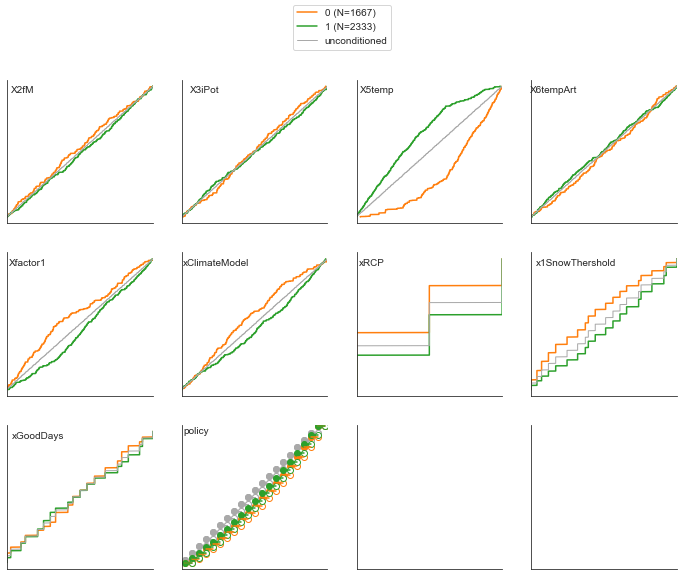

In [80]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y'] < 70
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_gooddays.svg'), format='svg', dpi=600)

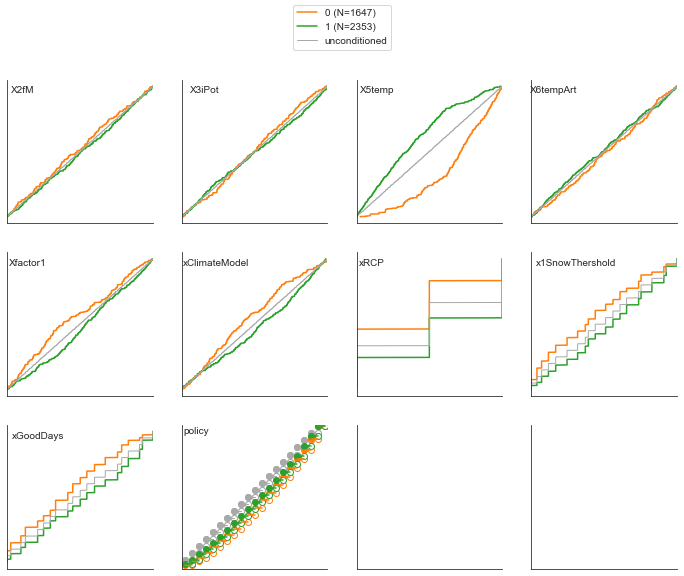

In [81]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y6'] < 0.6
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

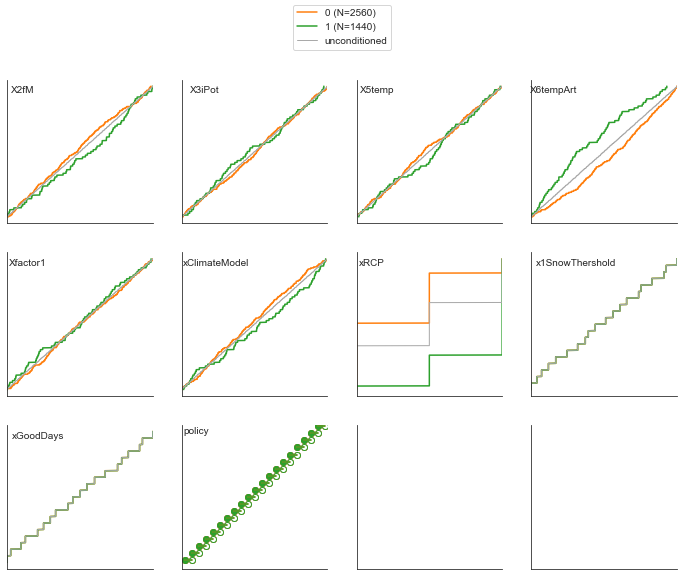

In [82]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y4'] < 60
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

### Scatter Plots (Inputs vs Outputs)

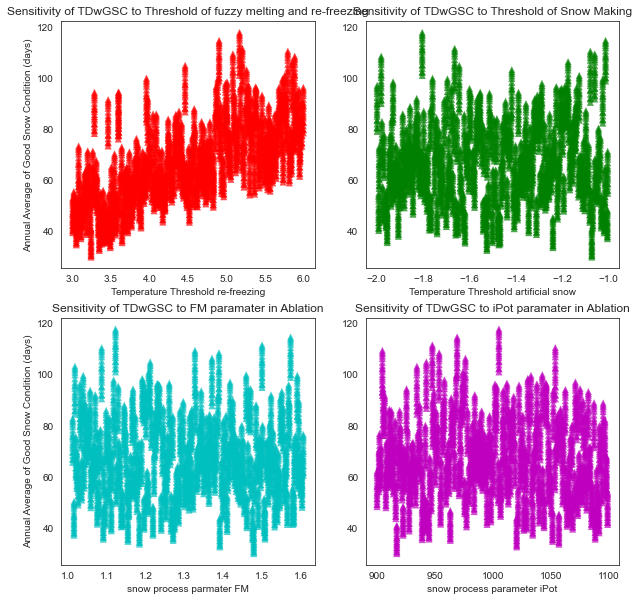

In [83]:
#fig, (ax1, ax2) = plt.subplots(1,2)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
#axs[0,0].scatter(xGoodDays, y, s = 200, c='b' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Good Days Condition')

#axs[0,1].scatter(x1SnowThershold, y, s = 200, c='orange' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Snow Threshold Condition')

axs[0,0].scatter(x5, YY, s = 50, c='r' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[0,1].scatter(x6, YY, s = 50, c='g' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')

axs[1,0].scatter(x2, YY, s = 50, c='c' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[1,1].scatter(x3, YY, s = 50, c='m' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')


# produce a legend with the unique colors from the scatter
#axs[0,0].set_xlabel("Good Days Condition")
#axs[0,1].set_xlabel("Snow Threshold Condition")
axs[0,0].set_xlabel("Temperature Threshold re-freezing")
axs[0,1].set_xlabel("Temperature Threshold artificial snow")
axs[1,0].set_xlabel("snow process parmater FM")
axs[1,1].set_xlabel("snow process parameter iPot")


axs[0,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[1,1].set_ylabel("Frequency of Tipping points")
#axs[2,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[2,1].set_ylabel("Frequency of Tipping points")

#axs[0,0].set_title('Sensitivity of TDwGSC to Policy-1 (less that 100 days)')
#axs[0,1].set_title('Sensitivity of TDwGSC to Policy-2 (300 mm)')
axs[0,0].set_title('Sensitivity of TDwGSC to Threshold of fuzzy melting and re-freezing')
axs[0,1].set_title('Sensitivity of TDwGSC to Threshold of Snow Making')
axs[1,0].set_title('Sensitivity of TDwGSC to FM paramater in Ablation')
axs[1,1].set_title('Sensitivity of TDwGSC to iPot paramater in Ablation')


#axs[0,0].text(0, 130, r'A', fontsize=15)
#axs[0,1].text(-1.9, 130, r'B', fontsize=15)
#axs[1,0].text(1.04, 130, r'C', fontsize=15)
#axs[1,1].text(920, 130, r'D', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'SA4_All.svg'), format='svg', dpi=300)

plt.show()

## 3D Scatter Plot

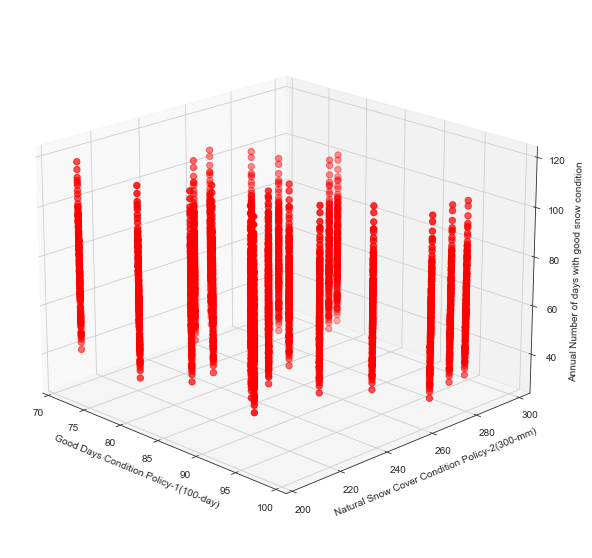

In [84]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xGoodDays, x1SnowThershold, YY, s = 40, c='r', marker='o')

ax.set_xlabel('Good Days Condition Policy-1(100-day)')
ax.set_ylabel('Natural Snow Cover Condition Policy-2(300-mm)')
ax.set_zlabel('Annual Number of days with good snow condition')


#ax.scatter(100, 300, 40, color='green')


#x = np.linspace(75,100,5)
#y = np.linspace(220,300,16)
#X,Y = np.meshgrid(x,y)
#Z= X + Y -X - Y + 40 
#surf = ax.plot_surface(X, Y, Z, alpha = 0.2)
ax.view_init(20, -45)

fig.savefig(os.path.join(rootVisualization, 'SA_Policy_All.svg'), format='svg', dpi=300)
plt.show()

### Defining the Q0.9 and Q0.1 databases

In [85]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

#print(q10_years_Art[0])
#print(q25_years_Art[0])
#print(q50_years_Art[0])
#print(q75_years_Art[0])
#print(q90_years_Art[0])
#print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[29.73247029]
[49.69416362]
[72.30591962]
[93.32261471]
[110.67847412]
(118, 1)
[1.19]
[2.03]
[3.03]
[4.1]
[5.041]
(118, 1)
[34.71450802]
[58.43848017]
[85.50714886]
[100.]
[100.]
(118, 1)


In [86]:
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
#print(matrix_Art26.shape)
#print(matrix_Art45.shape)
#print(matrix_Art85.shape)
#print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000
#########
#########
(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
4000


In [87]:
print(matrix_GoodDays[:, :, 1:2].shape)
print(matrix_GoodDays[3, 0, 1:2])
print(matrix_GoodDays[4].shape)

(4000, 119, 1)
['isOverSnow_sc_Ver1_45_12']
(119, 2)


## Analysis for different RCP2.6, RCP4.5, and RCP8.5
### Calculate quantiles for each RCP scenarios

In [88]:
q10_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.9, axis=0)



#2020/08/13
q10_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.9, axis=0)


q10_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.9, axis=0)


#### Make dataframes from quantiles

In [89]:
dfq50_26 = pd.DataFrame(q50_years_26)
dfq50_26.columns = ['median26']
dfq50_45 = pd.DataFrame(q50_years_45)
dfq50_45.columns = ['median45']
dfq50_85 = pd.DataFrame(q50_years_85)
dfq50_85.columns = ['median85']

dfq90_26 = pd.DataFrame(q90_years_26)
dfq90_26.columns = ['Q90_26']
dfq90_45 = pd.DataFrame(q90_years_45)
dfq90_45.columns = ['Q90_45']
dfq90_85 = pd.DataFrame(q90_years_85)
dfq90_85.columns = ['Q90_85']

dfq10_26 = pd.DataFrame(q10_years_26)
dfq10_26.columns = ['Q10_26']
dfq10_45 = pd.DataFrame(q10_years_45)
dfq10_45.columns = ['Q10_45']
dfq10_85 = pd.DataFrame(q10_years_85)
dfq10_85.columns = ['Q10_85']

### 2020/08/13
dfq50_fin_26 = pd.DataFrame(q50_years_fin_26)
dfq50_fin_26.columns = ['median26']
dfq50_fin_45 = pd.DataFrame(q50_years_fin_45)
dfq50_fin_45.columns = ['median45']
dfq50_fin_85 = pd.DataFrame(q50_years_fin_85)
dfq50_fin_85.columns = ['median85']

dfq90_fin_26 = pd.DataFrame(q90_years_fin_26)
dfq90_fin_26.columns = ['median26']
dfq90_fin_45 = pd.DataFrame(q90_years_fin_45)
dfq90_fin_45.columns = ['median45']
dfq90_fin_85 = pd.DataFrame(q90_years_fin_85)
dfq90_fin_85.columns = ['median85']

dfq10_fin_26 = pd.DataFrame(q10_years_fin_26)
dfq10_fin_26.columns = ['median26']
dfq10_fin_45 = pd.DataFrame(q10_years_fin_45)
dfq10_fin_45.columns = ['median45']
dfq10_fin_85 = pd.DataFrame(q10_years_fin_85)
dfq10_fin_85.columns = ['median85']

dfq50_Art_26 = pd.DataFrame(q50_years_Art_26)
dfq50_Art_26.columns = ['median26']
dfq50_Art_45 = pd.DataFrame(q50_years_Art_45)
dfq50_Art_45.columns = ['median45']
dfq50_Art_85 = pd.DataFrame(q50_years_Art_85)
dfq50_Art_85.columns = ['median85']

dfq90_Art_26 = pd.DataFrame(q90_years_Art_26)
dfq90_Art_26.columns = ['median26']
dfq90_Art_45 = pd.DataFrame(q90_years_Art_45)
dfq90_Art_45.columns = ['median45']
dfq90_Art_85 = pd.DataFrame(q90_years_Art_85)
dfq90_Art_85.columns = ['median85']

dfq10_Art_26 = pd.DataFrame(q10_years_Art_26)
dfq10_Art_26.columns = ['median26']
dfq10_Art_45 = pd.DataFrame(q10_years_Art_45)
dfq10_Art_45.columns = ['median45']
dfq10_Art_85 = pd.DataFrame(q10_years_Art_85)
dfq10_Art_85.columns = ['median85']

dfq50_Like_26 = pd.DataFrame(q50_years_Like_26)
dfq50_Like_26.columns = ['median26']
dfq50_Like_45 = pd.DataFrame(q50_years_Like_45)
dfq50_Like_45.columns = ['median45']
dfq50_Like_85 = pd.DataFrame(q50_years_Like_85)
dfq50_Like_85.columns = ['median85']

dfq90_Like_26 = pd.DataFrame(q90_years_Like_26)
dfq90_Like_26.columns = ['median26']
dfq90_Like_45 = pd.DataFrame(q90_years_Like_45)
dfq90_Like_45.columns = ['median45']
dfq90_Like_85 = pd.DataFrame(q90_years_Like_85)
dfq90_Like_85.columns = ['median85']

dfq10_Like_26 = pd.DataFrame(q10_years_Like_26)
dfq10_Like_26.columns = ['median26']
dfq10_Like_45 = pd.DataFrame(q10_years_Like_45)
dfq10_Like_45.columns = ['median45']
dfq10_Like_85 = pd.DataFrame(q10_years_Like_85)
dfq10_Like_85.columns = ['median85']

In [90]:
dfq50_26.head()

median26
0   62.287210
1   88.409452
2   98.650881
3   74.494394
4  105.762175

In [91]:
dfAllAverages = pd.concat((dfq50_26, dfq50_45, dfq50_85), axis=1)
dfAllAverages_Q90 = pd.concat((dfq90_26, dfq90_45, dfq90_85), axis=1)
dfAllAverages_Q10 = pd.concat((dfq10_26, dfq10_45, dfq10_85), axis=1)

dfAllAverages_fin = pd.concat((dfq50_fin_26, dfq50_fin_45, dfq50_fin_85), axis=1)
dfAllAverages_Q90_fin = pd.concat((dfq90_fin_26, dfq90_fin_45, dfq90_fin_85), axis=1)
dfAllAverages_Q10_fin = pd.concat((dfq10_fin_26, dfq10_fin_45, dfq10_fin_85), axis=1)

dfAllAverages_Art = pd.concat((dfq50_Art_26, dfq50_Art_45, dfq50_Art_85), axis=1)
dfAllAverages_Q90_Art = pd.concat((dfq90_Art_26, dfq90_Art_45, dfq90_Art_85), axis=1)
dfAllAverages_Q10_Art = pd.concat((dfq10_Art_26, dfq10_Art_45, dfq10_Art_85), axis=1)

dfAllAverages_Like = pd.concat((dfq50_Like_26, dfq50_Like_45, dfq50_Like_85), axis=1)
dfAllAverages_Q90_Like = pd.concat((dfq90_Like_26, dfq90_Like_45, dfq90_Like_85), axis=1)
dfAllAverages_Q10_Like = pd.concat((dfq10_Like_26, dfq10_Like_45, dfq10_Like_85), axis=1)

In [92]:
dfAllAverages.head()

median26    median45    median85
0   62.287210   75.309830   78.181344
1   88.409452  105.835452  111.587200
2   98.650881  115.251074  106.841756
3   74.494394   81.962362   92.450868
4  105.762175  108.659961  119.376339

In [93]:
print('*** All RCPs***')
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)
print('*** RCP2.6***')
print(q10_years_26[0])
print(q25_years_26[0])
print(q50_years_26[0])
print(q75_years_26[0])
print(q90_years_26[0])
print(q50_years_26.shape)
print('*** RCP4.5***')
print(q10_years_45[0])
print(q25_years_45[0])
print(q50_years_45[0])
print(q75_years_45[0])
print(q90_years_45[0])
print(q50_years_45.shape)
print('*** RCP8.5***')
print(q10_years_85[0])
print(q25_years_85[0])
print(q50_years_85[0])
print(q75_years_85[0])
print(q90_years_85[0])
print(q50_years_85.shape)

*** All RCPs***
[29.73247029]
[49.69416362]
[72.30591962]
[93.32261471]
[110.67847412]
(118, 1)
*** RCP2.6***
[26.47065614]
[44.75206134]
[62.28720997]
[88.60972069]
[112.76172572]
(118, 1)
*** RCP4.5***
[20.45517173]
[48.94233205]
[75.30983001]
[95.25454494]
[110.98496914]
(118, 1)
*** RCP8.5***
[40.07091243]
[58.9311781]
[78.18134422]
[93.82478038]
[107.74177574]
(118, 1)


In [94]:
print('*** All RCPs***')
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)
print('*** RCP2.6***')
print(q10_years_fin_26[0])
print(q25_years_fin_26[0])
print(q50_years_fin_26[0])
print(q75_years_fin_26[0])
print(q90_years_fin_26[0])
print(q50_years_fin_26.shape)
print('*** RCP4.5***')
print(q10_years_fin_45[0])
print(q25_years_fin_45[0])
print(q50_years_fin_45[0])
print(q75_years_fin_45[0])
print(q90_years_fin_45[0])
print(q50_years_fin_45.shape)
print('*** RCP8.5***')
print(q10_years_fin_85[0])
print(q25_years_fin_85[0])
print(q50_years_fin_85[0])
print(q75_years_fin_85[0])
print(q90_years_fin_85[0])
print(q50_years_fin_85.shape)

*** All RCPs***
[1.19]
[2.03]
[3.03]
[4.1]
[5.041]
(118, 1)
*** RCP2.6***
[1.05]
[1.7575]
[2.65]
[3.8325]
[4.97]
(118, 1)
*** RCP4.5***
[0.919]
[2.025]
[3.135]
[4.24]
[5.142]
(118, 1)
*** RCP8.5***
[1.609]
[2.34]
[3.27]
[4.16]
[4.991]
(118, 1)


### RCP 2.6 Number of days with Good Snow Condition over the time

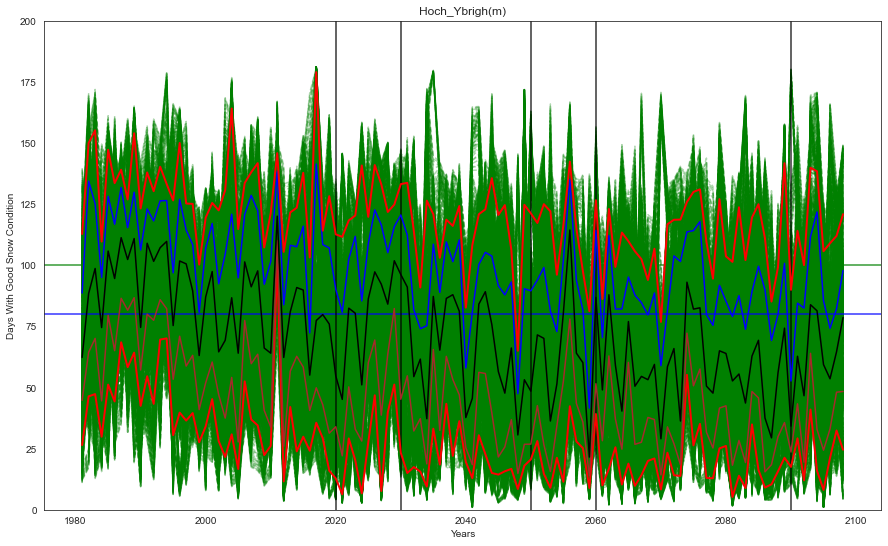

In [96]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays26), p_Step):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_26, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_26, color='red', linewidth = 2, alpha=1)

axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP26.svg'), format='svg', dpi=300)
plt.show()

### RCP 4.5 Number of days with Good Snow Condition over the time

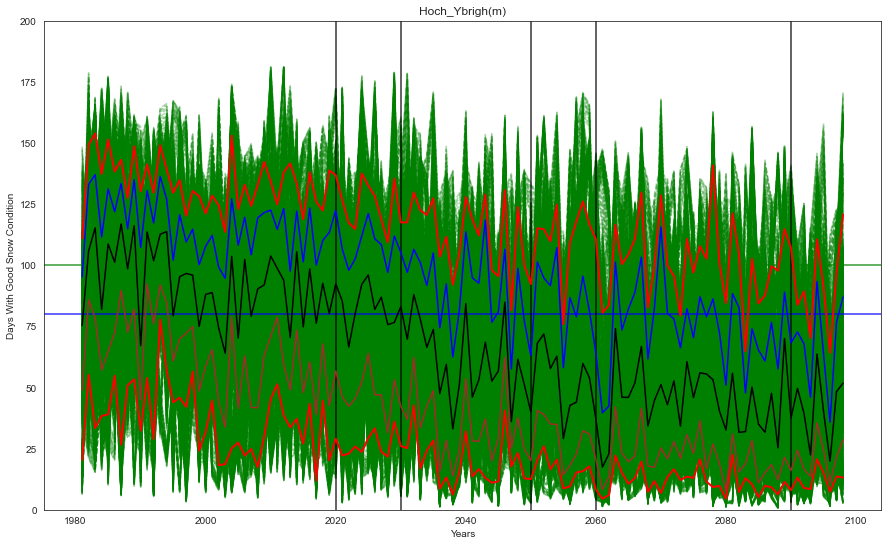

In [98]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays45), p_Step):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_45, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_45, color='red', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

### RCP 8.5 Number of days with Good Snow Condition over the time

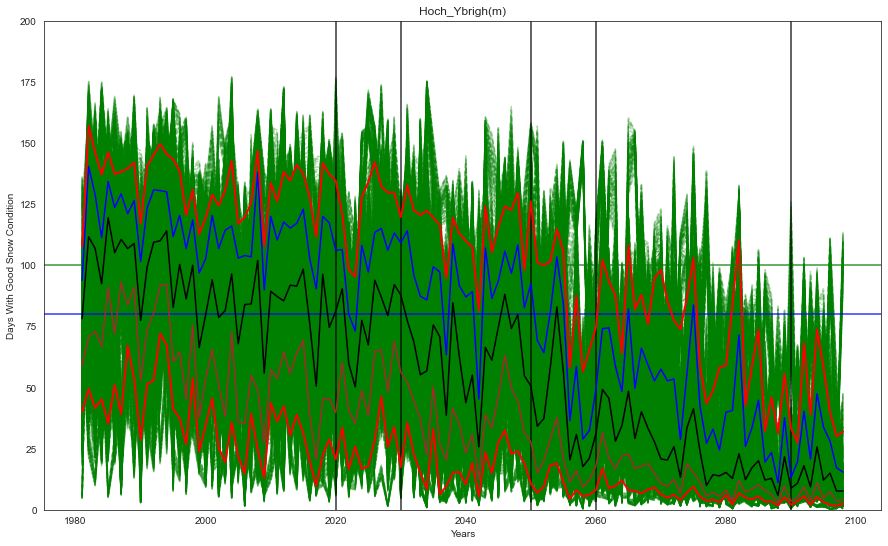

In [99]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_GoodDays85), p_Step):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_85, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_85, color='red', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

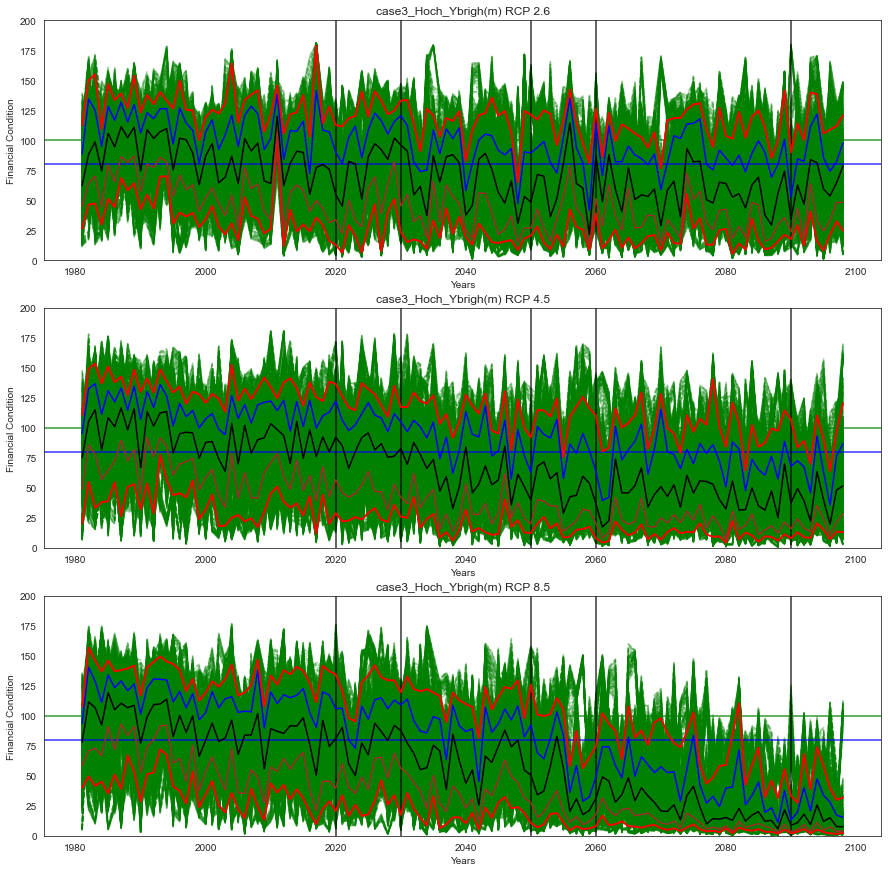

In [100]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_GoodDays26), p_Step):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_GoodDays45), p_Step):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_GoodDays85), p_Step):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)    


axs[0].axhline(y=100, color='green', alpha=0.8)
axs[0].axhline(y=80, color='blue', alpha=0.8)
axs[1].axhline(y=100, color='green', alpha=0.8)
axs[1].axhline(y=80, color='blue', alpha=0.8)
axs[2].axhline(y=100, color='green', alpha=0.8)
axs[2].axhline(y=80, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_26, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_45, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_85, color='red', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =200)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Financial Condition')

axs[1].set_ylim(bottom=0, top =200)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Financial Condition')

axs[2].set_ylim(bottom=0, top =200)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Financial Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_GoodDays.svg'), format='svg', dpi=300)
plt.show()

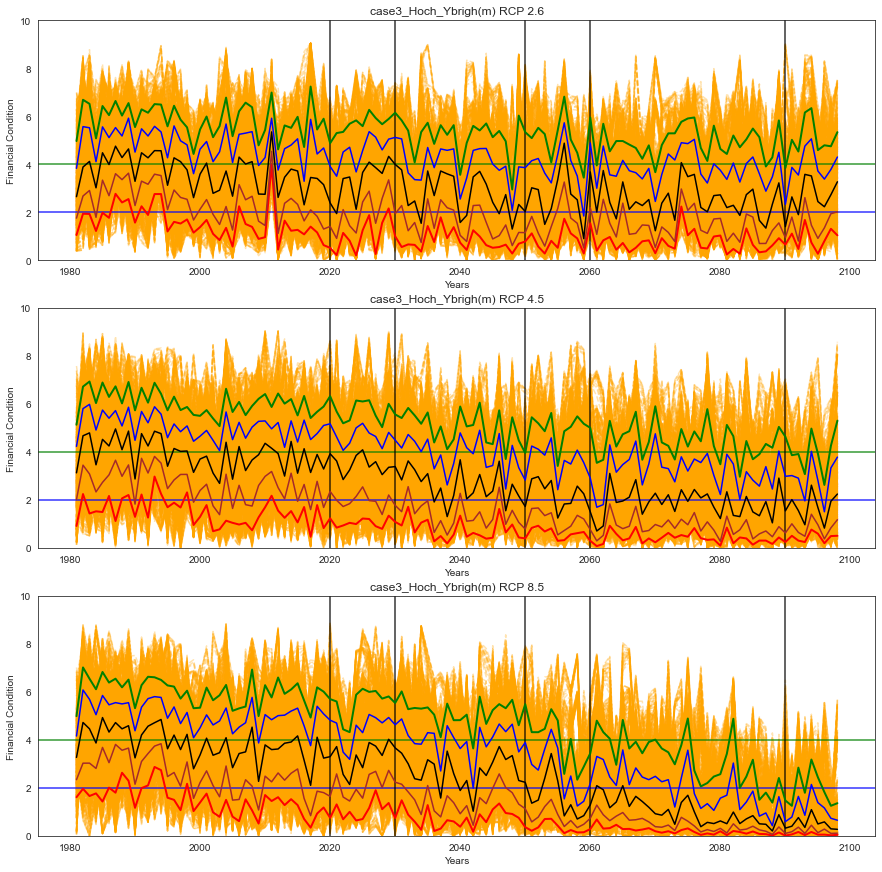

In [101]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_fin26), p_Step):
    a = matrix_fin26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_fin45), p_Step):
    a = matrix_fin45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_fin85), p_Step):
    a = matrix_fin85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)    


axs[0].axhline(y=4, color='green', alpha=0.8)
axs[0].axhline(y=2, color='blue', alpha=0.8)
axs[1].axhline(y=4, color='green', alpha=0.8)
axs[1].axhline(y=2, color='blue', alpha=0.8)
axs[2].axhline(y=4, color='green', alpha=0.8)
axs[2].axhline(y=2, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_fin_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_fin_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_fin_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_fin_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_fin_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_fin_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_fin_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_fin_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_fin_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_fin_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_fin_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_fin_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_fin_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_fin_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_fin_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =10)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Financial Condition')

axs[1].set_ylim(bottom=0, top =10)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Financial Condition')

axs[2].set_ylim(bottom=0, top =10)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Financial Condition')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Financial.svg'), format='svg', dpi=300)

plt.show()

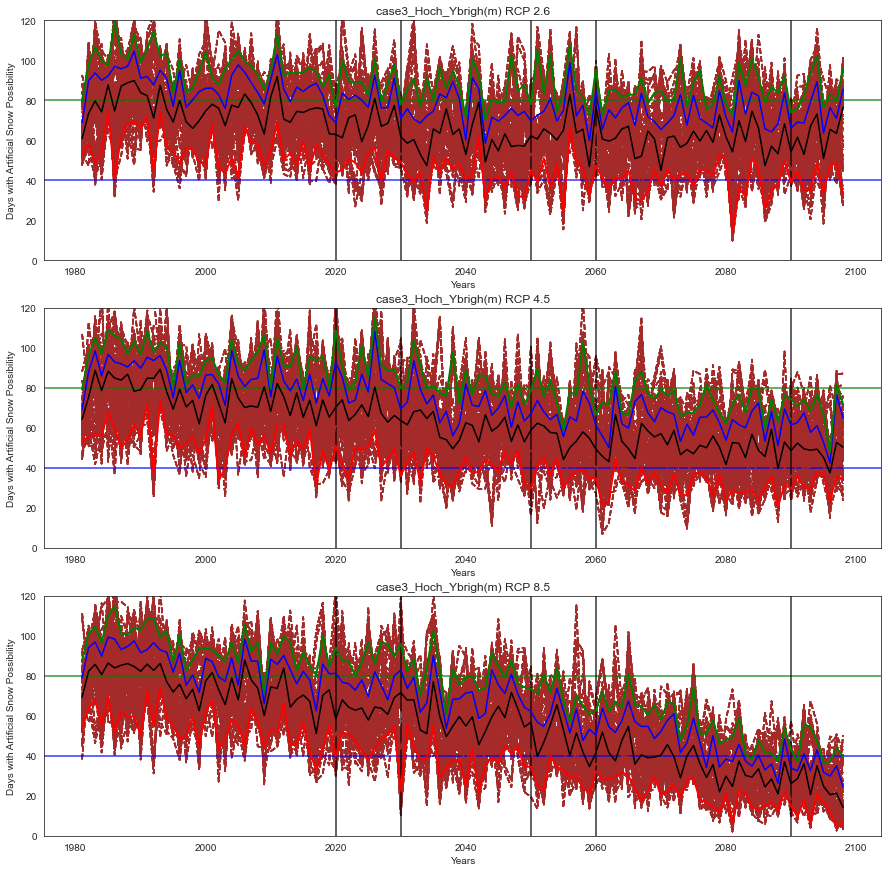

In [102]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Art26), p_Step):
    a = matrix_Art26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Art45), p_Step):
    a = matrix_Art45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Art85), p_Step):
    a = matrix_Art85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)    


axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=40, color='blue', alpha=0.8)
axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=40, color='blue', alpha=0.8)
axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=40, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Art_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Art_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Art_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Art_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Art_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Art_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Art_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Art_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Art_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Art_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Art_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Art_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Art_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Art_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Art_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =120)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Days with Artificial Snow Possibility')

axs[1].set_ylim(bottom=0, top =120)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Days with Artificial Snow Possibility')

axs[2].set_ylim(bottom=0, top =120)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Days with Artificial Snow Possibility')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_ArtificialSnow.svg'), format='svg', dpi=300)

plt.show()

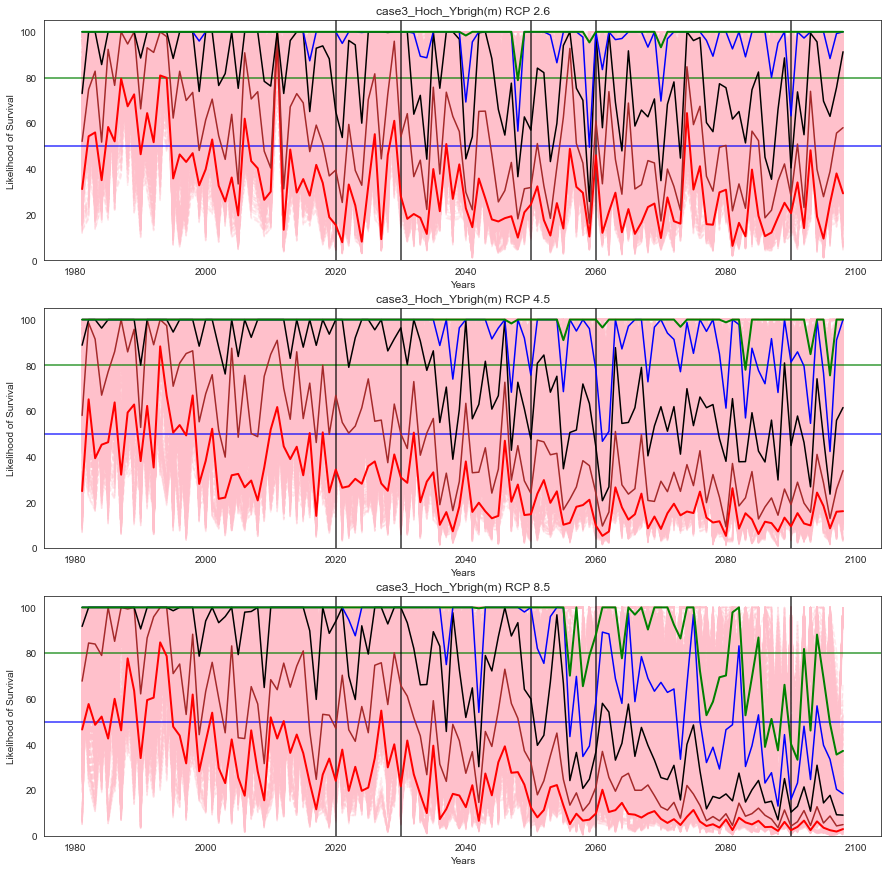

In [103]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Like26), p_Step):
    a = matrix_Like26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Like45), p_Step):
    a = matrix_Like45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Like85), p_Step):
    a = matrix_Like85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=alpha_Fade)    


axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=50, color='blue', alpha=0.8)
axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=50, color='blue', alpha=0.8)
axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=50, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Like_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Like_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Like_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Like_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Like_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Like_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Like_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Like_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Like_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Like_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Like_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Like_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Like_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Like_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Like_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =105)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Likelihood of Survival')

axs[1].set_ylim(bottom=0, top =105)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Likelihood of Survival')

axs[2].set_ylim(bottom=0, top =105)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Likelihood of Survival')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Likelihood_Survival.svg'), format='svg', dpi=300)

plt.show()

In [104]:
dfAllAverages.head()

median26    median45    median85
0   62.287210   75.309830   78.181344
1   88.409452  105.835452  111.587200
2   98.650881  115.251074  106.841756
3   74.494394   81.962362   92.450868
4  105.762175  108.659961  119.376339

### Worst Case: Quantile 0.10 >> 90% of the scenarios satisfy this condition

In [105]:
y_axis = np.arange(1981, 2100, step= 20)

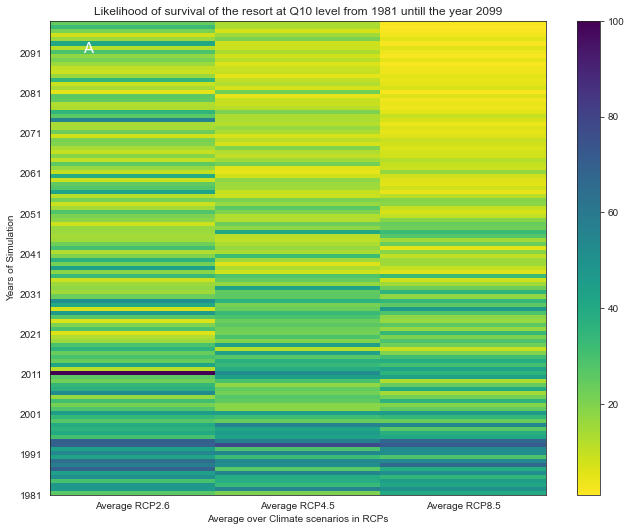

In [106]:
from matplotlib.ticker import FuncFormatter


fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c3 = ax3.pcolor(dfAllAverages_Q10, cmap='viridis_r', vmin=1, vmax=100)
cb3 = fig.colorbar(c3)

#xticks(np.arange(0, 4, step=1))
ax3.set_title('default: no edges')


ax3.set_xlabel("Average over Climate scenarios in RCPs")

ax3.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099))

ax3.text(0.2, 110, 'A', color = 'white', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'Likelihood_All.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Median Case: Quantile 0.5 >> 50 % of the scenarios satisfy this condition

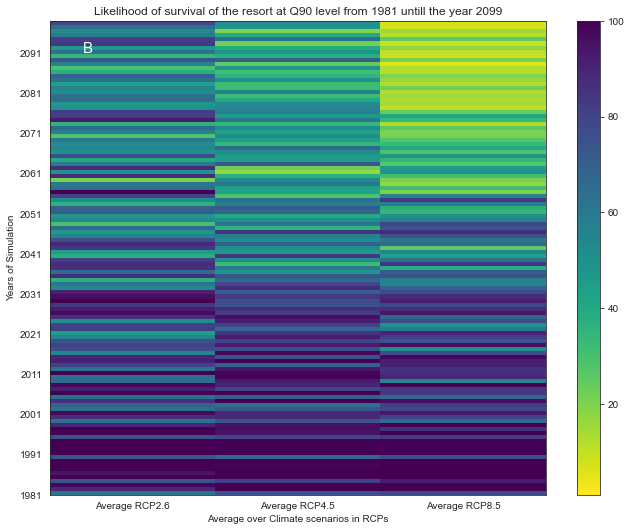

In [107]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'B', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Best Case: Quantile 0.9 >> Only 10 % of the scenarios satisfy this condition

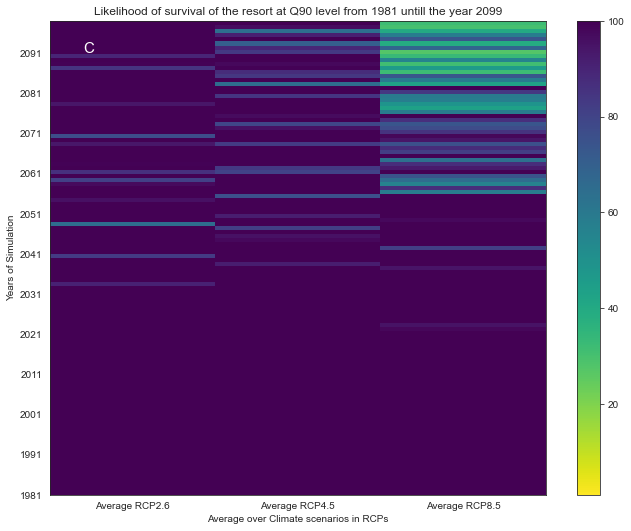

In [108]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages_Q90, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'C', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Making dataframes for all RCP2.6 , RCP4.5, and RCP8.5 scenarios

In [109]:
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(matrix_GoodDays.shape)

(1340, 119, 2)
(1320, 119, 2)
(1340, 119, 2)
(4000, 119, 2)


In [110]:
pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1]).head()

Season
0  1981-1982
1  1982-1983
2  1983-1984
3  1984-1985
4  1985-1986

In [111]:
df26_all = pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1])
for i in range(len(matrix_GoodDays26)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays26[i,0,1:])])
    df26_all = pd.concat((df26_all, b), axis = 1)

In [112]:
df26_all.head(7)

Season sc_1_['isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp']  \
0  1981-1982                                  46.81420075446479    
1  1982-1983                                 108.33553543681293    
2  1983-1984                                 161.58798963268362    
3  1984-1985                                  65.08585365844368    
4  1985-1986                                  79.15011525739325    
5  1986-1987                                  70.85888405491328    
6  1987-1988                                 134.91748790801915    

  sc_2_['isOverSnow_sc_Ver1_26_4'] sc_3_['isOverSnow_sc_Ver1_26_5']  \
0               25.312453611154925                39.34663167494828   
1               102.37793260238224                93.94870759296741   
2                58.99155617611879                107.6551790416994   
3               128.32165132202752                 98.5259780802596   
4               126.38789518837434                68.92910884002028   
5               119.39124349772572               113.24991933823672   
6                81.68894247530073                91.99647781700935   

  sc_4_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  79.08668948695714        
1                                  80.74632166896308        
2                                  156.2266767751982        
3                                  34.18738896104001        
4                                  138.8619284967827        
5                                  58.60861784319333        
6                                 132.06770573613966        

  sc_5_['isOverSnow_sc_Ver2_26_4'] sc_6_['isOverSnow_sc_Ver2_26_2']  \
0               31.148158039199952                62.48724820115396   
1                69.48084923132204                46.75633173197692   
2                122.0547440371692                67.82076970221455   
3               102.60458892313429                52.94743970174189   
4               115.26993946426433                91.93041938772892   
5               122.90246374772025                67.84246648056674   
6               111.20970998205907               138.95121258085885   

  sc_7_['isOverSnow_sc_Ver1_26_11'] sc_8_['isOverSnow_sc_Ver2_26_6']  \
0                 36.22922534438987                112.6708379595377   
1                46.894674211007555                60.34849074241314   
2                117.17189949684226                 32.9138526394287   
3                 70.19316049151986                82.08106962807969   
4                101.39477137505033                24.99912523596586   
5                107.03910772190764               155.79996796758365   
6                146.38936362629659                85.49255442773486   

  sc_9_['isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp']  \
0                                  81.51973682588228    
1                                 155.64996509675393    
2                                  102.5208955272294    
3                                 34.125425235155866    
4                                 149.86188991078015    
5                                 136.04499675798596    
6                                  126.4634292219883    

  sc_10_['isOverSnow_sc_Ver2_26_7']  \
0                 49.96971289622107   
1                 82.96371379646901   
2                 121.5804799628035   
3                  87.7549169896876   
4                108.28956558930521   
5                 35.95508913027921   
6                  92.0648106429829   

  sc_11_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  80.85263780523826         
1                                  83.38141869701914         
2                                 158.65547471719856         
3                                  36.25116125544121         
4                                  144.8899885061311         
5                                  71.06729610124529         
6                                 134.57284349576577 

In [113]:
matrix_GoodDays45[2,0,1:]

array(['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP45-pcp'], dtype='<U46')

In [114]:
df45_all = pd.DataFrame((matrix_GoodDays45[0][1:,0:1]), columns=matrix_GoodDays45[0,0,0:1])
for i in range(len(matrix_GoodDays45)):
    #b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=matrix_GoodDays45[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays45[i,0,1:])])

    df45_all = pd.concat((df45_all, b), axis = 1)

In [115]:
df45_all.head(7)

Season sc_1_['isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp']  \
0  1981-1982                                 42.48171759266843   
1  1982-1983                                103.65717766212514   
2  1983-1984                                40.377548163496215   
3  1984-1985                                  82.9123390921719   
4  1985-1986                                131.09211320156828   
5  1986-1987                                 65.65304543531182   
6  1987-1988                                 42.28352123615734   

  sc_2_['isOverSnow_sc_Ver2_45_8']  \
0               106.83935088861168   
1                83.24309081082015   
2                114.2037629557675   
3               124.56795800410178   
4                59.44714304056921   
5               32.638793320801994   
6                161.4493594445009   

  sc_3_['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP45-pcp']  \
0                                  45.03821312137329        
1                                   83.1970350663627        
2                                 124.40290049905127        
3                                 103.59746608063915        
4                                  59.78055132619523        
5                                  52.24032164502745        
6                                 125.19912186717119        

  sc_4_['isOverSnow_sc_Ver1_45_12']  \
0                 72.19911488544147   
1                 92.92986923425748   
2                145.54212811528345   
3                 50.75182134026559   
4                 97.44300687287505   
5                 59.73232093706752   
6                 131.2695848632357   

  sc_5_['isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp']  \
0                                48.585034625282745   
1                                115.04332190427398   
2                                46.178560726227474   
3                                 85.62812786070826   
4                                141.78344549961997   
5                                 75.08537004822936   
6                                48.358363544418495   

  sc_6_['isOverSnow_sc_Ver2_45_8'] sc_7_['isOverSnow_sc_Ver2_45_11']  \
0               113.17293499825695                 91.46504648434595   
1                 95.1807000100429                125.04337559990688   
2               123.50985832954271                126.78251169513712   
3                133.2032928806707                 53.62870642496603   
4                67.98787023382154                 44.03339575615371   
5                37.32798468328138                121.02711644005105   
6               165.51279555490538                114.63785096448298   

  sc_8_['isOverSnow_sc_Ver2_45_11']  \
0                  89.7527919417071   
1                124.57713147869303   
2                125.90566910172925   
3                 46.85953497063766   
4                  43.2319620230557   
5                116.99670149056007   
6                114.56134686327331   

  sc_9_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP45-pcp']  \
0                                 107.86789685299695     
1                                 146.99783281981362     
2                                 125.38101295784625     
3                                 132.84515887889606     
4                                  64.68862564631911     
5                                 109.20777269403469     
6                                  144.6179028404038     

  sc_10_['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP45-pcp']  \
0                                 51.508819980961064         
1                                  89.31027486754152         
2                                 132.92571252937006         
3                                 110.81546916996759         
4                                    68.369179041926         
5                                  59.74565012403359         
6                                 128.29134446283877         

  sc_11_['isOverSnow_SMHI-RCA-IPSL-EUR11-RCP45-pcp']  \
0                    

In [116]:
df85_all = pd.DataFrame((matrix_GoodDays85[0][1:,0:1]), columns=matrix_GoodDays85[0,0,0:1])
for i in range(len(matrix_GoodDays85)):
    #b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=matrix_GoodDays85[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays85[i,0,1:])])

    df85_all = pd.concat((df85_all, b), axis = 1)

In [117]:
df85_all.head(7)

Season sc_1_['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR44-RCP85-pcp']  \
0  1981-1982                                  45.97420160060409        
1  1982-1983                                  80.59746755990692        
2  1983-1984                                 148.92295237433186        
3  1984-1985                                 61.814895950525674        
4  1985-1986                                  80.09882157602539        
5  1986-1987                                 50.186314349345494        
6  1987-1988                                     132.9614253387        

  sc_2_['isOverSnow_sc_Ver2_85_25'] sc_3_['isOverSnow_sc_Ver2_85_30']  \
0                101.65879298204831                118.17311706387915   
1                136.97460751453613                126.52352766179649   
2                  98.3321446457375                160.95736922130632   
3                123.11682049913499                107.90381840100635   
4                 134.6734469672508                 28.49424706348513   
5                137.01540235261908                 87.32883811907395   
6                32.292669421141454                106.71155882230077   

  sc_4_['isOverSnow_CLMCOM-CCLM4-ECEARTH-EUR11-RCP85-pcp']  \
0                                  42.83865370384153         
1                                 152.53962946280544         
2                                  87.12799513567283         
3                                 146.90979910859582         
4                                  21.48704241814996         
5                                  94.82119440130955         
6                                   87.0079447711575         

  sc_5_['isOverSnow_sc_Ver2_85_29'] sc_6_['isOverSnow_sc_Ver2_85_5']  \
0                  79.7514189821055                44.90794919275636   
1                 69.26411353911533               150.39432083126363   
2                139.58943087327125               149.60535007729138   
3                 79.30557387827564                73.65406229779899   
4                122.84616451056826               131.60187891752574   
5                119.61070413041224               131.69061058612425   
6                103.29111759260286               151.41862946449575   

  sc_7_['isOverSnow_SMHI-RCA-MIROC-EUR44-RCP85-pcp']  \
0                                  75.89744063099415   
1                                  38.41304779809217   
2                                 115.77327020306052   
3                                  47.49592100989269   
4                                 24.016429800028703   
5                                 142.11202245929263   
6                                  99.80307796061565   

  sc_8_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP85-pcp']  \
0                                  47.38336452654447     
1                                  127.1128603843392     
2                                 103.10314564730636     
3                                 112.17783211422083     
4                                 24.421939187844497     
5                                  97.94906887704468     
6                                  134.2365611406307     

  sc_9_['isOverSnow_sc_Ver2_85_15']  \
0                28.172060758500074   
1                138.84042267507186   
2                 51.45834649419906   
3                 72.38179154452345   
4                150.04899580830252   
5                101.84635813961752   
6                117.03371241037632   

  sc_10_['isOverSnow_CLMCOM-CCLM5-HADGEM-EUR44-RCP85-pcp']  \
0                                 114.99390489765004         
1                                  157.5698586186224         
2                                 117.02216830086218         
3                                 103.19571225739666         
4                                  142.9686686785463         
5                                  155.7911160816398         
6                                 130.77039454094015         

  sc_11_['isOverSnow_sc_Ver1_85_16'] sc_12_['i

In [118]:
df26_all_Matrix = df26_all.to_numpy()
df45_all_Matrix = df45_all.to_numpy()
df85_all_Matrix = df85_all.to_numpy()

### Survival Map CH2018 RCP2.6

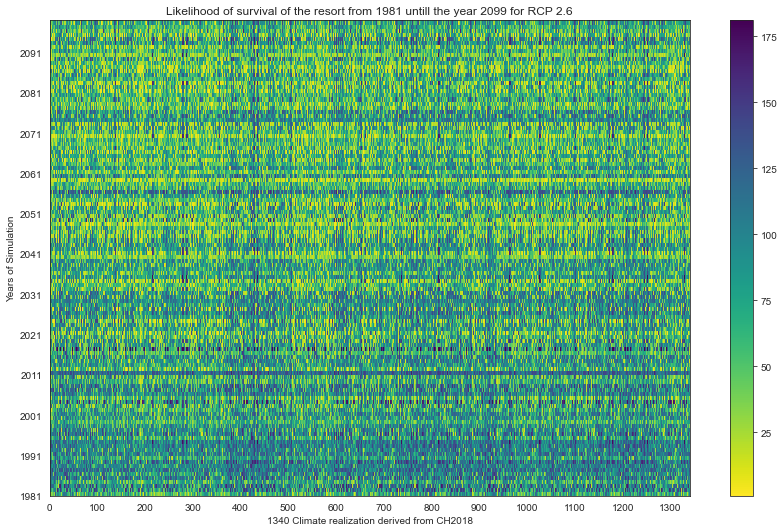

In [119]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df26_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z, cmap='viridis_r')
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays26), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays26)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 2.6))

fig.tight_layout()
plt.show()

### Survival AMap CH2018 RCP4.5

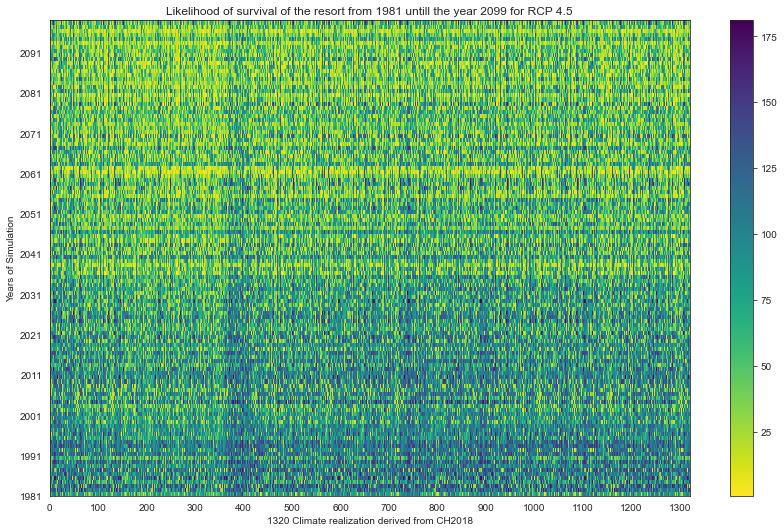

In [120]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df45_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='viridis_r')
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays45), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays45)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 4.5))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

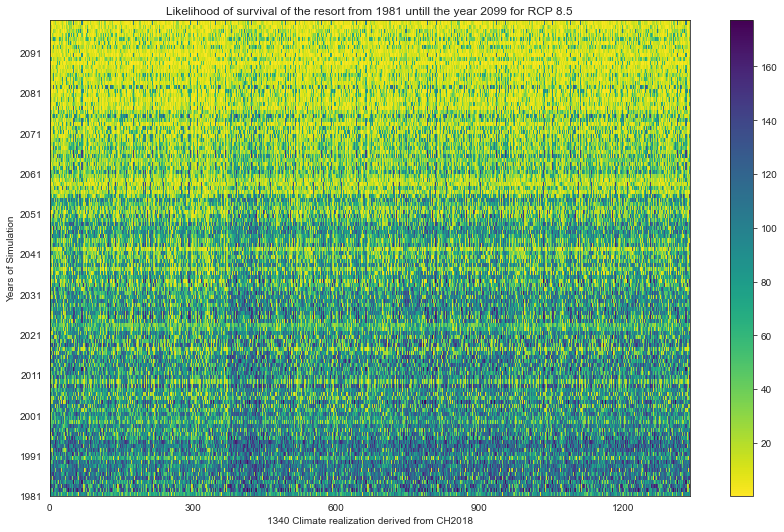

In [121]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df85_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='viridis_r')

cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays85), step=300)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays85)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 8.5))

fig.tight_layout()
plt.show()

## 3 years of not having good snow days

In [122]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (1 , simulations_Length, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            if float(df[dfColumns[i]].iloc[j]) < 100.0:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [123]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp']  \
0  1981-1982                                  46.81420075446479    
1  1982-1983                                 108.33553543681293    
2  1983-1984                                 161.58798963268362    
3  1984-1985                                  65.08585365844368    
4  1985-1986                                  79.15011525739325    

  sc_2_['isOverSnow_sc_Ver1_26_4'] sc_3_['isOverSnow_sc_Ver1_26_5']  \
0               25.312453611154925                39.34663167494828   
1               102.37793260238224                93.94870759296741   
2                58.99155617611879                107.6551790416994   
3               128.32165132202752                 98.5259780802596   
4               126.38789518837434                68.92910884002028   

  sc_4_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  79.08668948695714        
1                                  80.74632166896308        
2                                  156.2266767751982        
3                                  34.18738896104001        
4                                  138.8619284967827        

  sc_5_['isOverSnow_sc_Ver2_26_4'] sc_6_['isOverSnow_sc_Ver2_26_2']  \
0               31.148158039199952                62.48724820115396   
1                69.48084923132204                46.75633173197692   
2                122.0547440371692                67.82076970221455   
3               102.60458892313429                52.94743970174189   
4               115.26993946426433                91.93041938772892   

  sc_7_['isOverSnow_sc_Ver1_26_11'] sc_8_['isOverSnow_sc_Ver2_26_6']  \
0                 36.22922534438987                112.6708379595377   
1                46.894674211007555                60.34849074241314   
2                117.17189949684226                 32.9138526394287   
3                 70.19316049151986                82.08106962807969   
4                101.39477137505033                24.99912523596586   

  sc_9_['isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp']  \
0                                  81.51973682588228    
1                                 155.64996509675393    
2                                  102.5208955272294    
3                                 34.125425235155866    
4                                 149.86188991078015    

  sc_10_['isOverSnow_sc_Ver2_26_7']  \
0                 49.96971289622107   
1                 82.96371379646901   
2                 121.5804799628035   
3                  87.7549169896876   
4                108.28956558930521   

  sc_11_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  80.85263780523826         
1                                  83.38141869701914         
2                                 158.65547471719856         
3                                  36.25116125544121         
4                                  144.8899885061311         

  sc_12_['isOverSnow_sc_Ver1_26_4']  \
0                27.280125723807256   
1                 103.7938941934753   
2                 73.92991160210603   
3                 126.2482540745802   
4                125.73667021761864   

  sc_13_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  49.97719199732241      
1                                 140.46845221029255      
2                                  70.90208735401266      
3                                  95.91700964262064      
4                                  62.35995111179267      

  sc_14_['isOverSnow_sc_Ver2_26_10']  \
0                  134.9915983083247   
1                  107.9448822415311   
2                   72.0164917244258   
3                  92.38223035012399   
4                 115.43924308965236   

  sc_15_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                   56.6119903279532         
1                                  47

In [124]:
type(df26_all)

pandas.core.frame.DataFrame

In [125]:
df26_allColumns = df26_all.columns

In [126]:
df26_all[df26_allColumns[1]].iloc[0]

'46.81420075446479'

In [127]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp']  \
0  1981-1982                                  46.81420075446479    
1  1982-1983                                 108.33553543681293    
2  1983-1984                                 161.58798963268362    
3  1984-1985                                  65.08585365844368    
4  1985-1986                                  79.15011525739325    

  sc_2_['isOverSnow_sc_Ver1_26_4'] sc_3_['isOverSnow_sc_Ver1_26_5']  \
0               25.312453611154925                39.34663167494828   
1               102.37793260238224                93.94870759296741   
2                58.99155617611879                107.6551790416994   
3               128.32165132202752                 98.5259780802596   
4               126.38789518837434                68.92910884002028   

  sc_4_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  79.08668948695714        
1                                  80.74632166896308        
2                                  156.2266767751982        
3                                  34.18738896104001        
4                                  138.8619284967827        

  sc_5_['isOverSnow_sc_Ver2_26_4'] sc_6_['isOverSnow_sc_Ver2_26_2']  \
0               31.148158039199952                62.48724820115396   
1                69.48084923132204                46.75633173197692   
2                122.0547440371692                67.82076970221455   
3               102.60458892313429                52.94743970174189   
4               115.26993946426433                91.93041938772892   

  sc_7_['isOverSnow_sc_Ver1_26_11'] sc_8_['isOverSnow_sc_Ver2_26_6']  \
0                 36.22922534438987                112.6708379595377   
1                46.894674211007555                60.34849074241314   
2                117.17189949684226                 32.9138526394287   
3                 70.19316049151986                82.08106962807969   
4                101.39477137505033                24.99912523596586   

  sc_9_['isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp']  \
0                                  81.51973682588228    
1                                 155.64996509675393    
2                                  102.5208955272294    
3                                 34.125425235155866    
4                                 149.86188991078015    

  sc_10_['isOverSnow_sc_Ver2_26_7']  \
0                 49.96971289622107   
1                 82.96371379646901   
2                 121.5804799628035   
3                  87.7549169896876   
4                108.28956558930521   

  sc_11_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  80.85263780523826         
1                                  83.38141869701914         
2                                 158.65547471719856         
3                                  36.25116125544121         
4                                  144.8899885061311         

  sc_12_['isOverSnow_sc_Ver1_26_4']  \
0                27.280125723807256   
1                 103.7938941934753   
2                 73.92991160210603   
3                 126.2482540745802   
4                125.73667021761864   

  sc_13_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  49.97719199732241      
1                                 140.46845221029255      
2                                  70.90208735401266      
3                                  95.91700964262064      
4                                  62.35995111179267      

  sc_14_['isOverSnow_sc_Ver2_26_10']  \
0                  134.9915983083247   
1                  107.9448822415311   
2                   72.0164917244258   
3                  92.38223035012399   
4                 115.43924308965236   

  sc_15_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                   56.6119903279532         
1                                  47

In [128]:
T1RCP26 = tipping_points_freq(df26_all)
T1RCP45 = tipping_points_freq(df45_all)
T1RCP85 = tipping_points_freq(df85_all)

In [129]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp']  \
0  1981-1982                                  46.81420075446479    
1  1982-1983                                 108.33553543681293    
2  1983-1984                                 161.58798963268362    
3  1984-1985                                  65.08585365844368    
4  1985-1986                                  79.15011525739325    

  sc_2_['isOverSnow_sc_Ver1_26_4'] sc_3_['isOverSnow_sc_Ver1_26_5']  \
0               25.312453611154925                39.34663167494828   
1               102.37793260238224                93.94870759296741   
2                58.99155617611879                107.6551790416994   
3               128.32165132202752                 98.5259780802596   
4               126.38789518837434                68.92910884002028   

  sc_4_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  79.08668948695714        
1                                  80.74632166896308        
2                                  156.2266767751982        
3                                  34.18738896104001        
4                                  138.8619284967827        

  sc_5_['isOverSnow_sc_Ver2_26_4'] sc_6_['isOverSnow_sc_Ver2_26_2']  \
0               31.148158039199952                62.48724820115396   
1                69.48084923132204                46.75633173197692   
2                122.0547440371692                67.82076970221455   
3               102.60458892313429                52.94743970174189   
4               115.26993946426433                91.93041938772892   

  sc_7_['isOverSnow_sc_Ver1_26_11'] sc_8_['isOverSnow_sc_Ver2_26_6']  \
0                 36.22922534438987                112.6708379595377   
1                46.894674211007555                60.34849074241314   
2                117.17189949684226                 32.9138526394287   
3                 70.19316049151986                82.08106962807969   
4                101.39477137505033                24.99912523596586   

  sc_9_['isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp']  \
0                                  81.51973682588228    
1                                 155.64996509675393    
2                                  102.5208955272294    
3                                 34.125425235155866    
4                                 149.86188991078015    

  sc_10_['isOverSnow_sc_Ver2_26_7']  \
0                 49.96971289622107   
1                 82.96371379646901   
2                 121.5804799628035   
3                  87.7549169896876   
4                108.28956558930521   

  sc_11_['isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp']  \
0                                  80.85263780523826         
1                                  83.38141869701914         
2                                 158.65547471719856         
3                                  36.25116125544121         
4                                  144.8899885061311         

  sc_12_['isOverSnow_sc_Ver1_26_4']  \
0                27.280125723807256   
1                 103.7938941934753   
2                 73.92991160210603   
3                 126.2482540745802   
4                125.73667021761864   

  sc_13_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  49.97719199732241      
1                                 140.46845221029255      
2                                  70.90208735401266      
3                                  95.91700964262064      
4                                  62.35995111179267      

  sc_14_['isOverSnow_sc_Ver2_26_10']  \
0                  134.9915983083247   
1                  107.9448822415311   
2                   72.0164917244258   
3                  92.38223035012399   
4                 115.43924308965236   

  sc_15_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                   56.6119903279532         
1                                  47

In [170]:
print(len(T1RCP26[1:]))
print(len(T1RCP45[1:]))
print(len(T1RCP85[1:]))

1340
1320
1340


In [131]:
type(T1RCP85)

numpy.ndarray

### Specify the number of runs
for instance : number_Simulations = 4000

In [184]:
number_Simulations = 4000
x_axis = np.arange(1,number_Simulations + 2)

In [185]:
print("The lengthe of Y is: {}".format(len(T1RCP26[1:])))
print("The lengthe of X is: {}".format(len(matrix_GoodDays26) + 1 -1))
print('***')
print("The lengthe of Y is: {}".format(len(T1RCP45[1:])))
print("The lengthe of X is: {}".format((len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1) -(len(matrix_GoodDays26) + 1)))
print('***')
print("The lengthe of Y is: {}".format(len(T1RCP85[1:])))
print("The lengthe of X is: {}".format(number_Simulations+1 - (len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1)))

The lengthe of Y is: 1340
The lengthe of X is: 1340
***
The lengthe of Y is: 1320
The lengthe of X is: 1320
***
The lengthe of Y is: 1340
The lengthe of X is: 1340


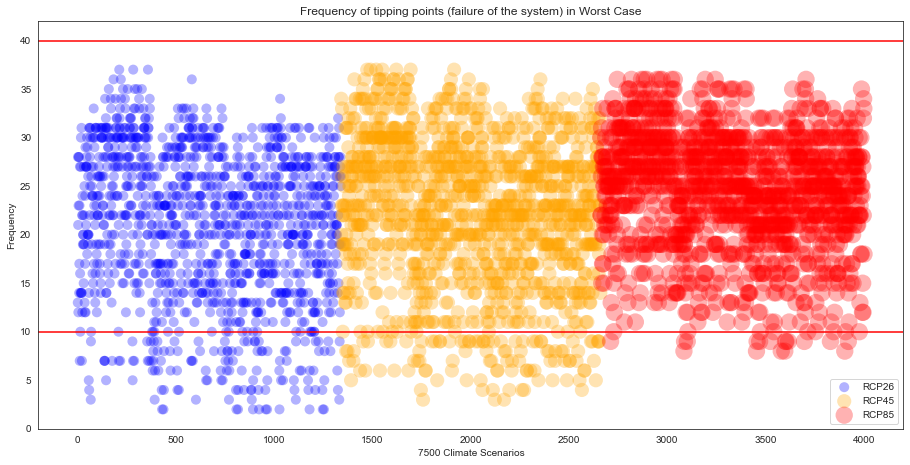

In [186]:
fig, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26[1:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45[1:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85[1:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points (failure of the system) in Worst Case")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("7500 Climate Scenarios")
ax1.set_ylim(bottom=0, top =42)
ax1.axhline(y=10, color='red')
ax1.axhline(y=40, color='red')

ax1.legend()


fig.savefig(os.path.join(rootVisualization, 'tipping_point_All.svg'), format='svg', dpi=1200)


### Tables of the paper: Uncertainty analysis of CH2018 randomness scenarios


In [187]:
from scipy.integrate import simps

def area_max_min_df (df, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario, dx=1)
    areamin1 = trapz(min_scenario, dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario, dx=1)
    areamin2 = simps(min_scenario, dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [188]:
max_scenario = df26_all.max(axis=1)
min_scenario = df26_all.min(axis=1)

In [189]:
max_scenario.to_numpy()

array([99.83551552, 99.9458072 , 99.95455891, 99.95593293, 99.99453755,
       99.94398919, 99.8663484 , 99.93274341, 99.9742546 , 99.95018704,
       99.99062334, 99.95354349, 99.92992971, 99.98064805, 99.91110261,
       99.99231086, 99.96899298, 99.95621938, 99.65138421, 99.94810809,
       99.86916517, 99.83534609, 99.89848292, 99.98467964, 99.68868697,
       99.82214497, 99.99435312, 99.94430348, 99.99837845, 99.97695589,
       99.99384039, 99.99155302, 99.97504953, 99.98754688, 99.9885454 ,
       99.93013869, 99.71295042, 99.97973581, 99.63229581, 99.70414717,
       99.9667416 , 99.94257963, 99.98709698, 99.95645629, 99.96606146,
       99.90562075, 99.95342476, 99.90419472, 99.9956916 , 99.9019168 ,
       99.82872883, 99.99644277, 99.98692219, 99.44487347, 99.98764585,
       99.82867041, 99.90073537, 99.98267834, 99.91102443, 99.87756376,
       99.92073679, 99.76768196, 99.95234148, 99.98454946, 99.94491332,
       99.58230498, 99.8448862 , 96.91110949, 99.95435589, 99.95

In [190]:
min_scenario.to_numpy()

array([ 10.90549667, 100.00307799, 100.10983139, 100.1216804 ,
       100.02103799, 100.12680759, 100.30999157, 100.00534065,
       100.00828671,  10.13433457, 100.01389464, 100.06188036,
       100.02463435, 100.25483476,  10.19950401,  10.08340342,
        10.01569051, 100.03578598, 100.00374652,  10.2076757 ,
       100.16329257,  10.21304656, 100.15022802,  10.23648179,
        10.24927845, 100.15587781, 100.00225655, 100.15924372,
        10.24787339, 100.01566564, 100.05013053,  10.13287944,
       100.10538764,  10.07267948, 100.021009  , 100.17842546,
       100.1574534 ,  10.14673006,  10.20730571,  10.03710392,
        10.03721013,  10.13825772,  10.09510699,  10.21535178,
       100.02182384, 100.06366199,  10.14330696, 100.06651055,
       100.14946288, 100.12742349,  10.04925126,  10.08645759,
        10.04528187,  10.03962714,  10.03170307, 100.25995032,
       100.05400557, 100.07037673, 100.030512  ,  10.19355846,
         0.93656396,  10.06341282,  10.09182478,  10.11

In [191]:
max_scenario.shape

(118,)

In [192]:
print("Resort3 Worst Case")
area_max_min_df(df26_all, 118)
area_max_min_df(df45_all, 118)
area_max_min_df(df85_all, 118)

Resort3 Worst Case
Start************************************************************
Uncertainty Band1 =71.54 days
Uncertainty Band2 =71.60 days
****************************************End

Start************************************************************
Uncertainty Band1 =65.84 days
Uncertainty Band2 =65.87 days
****************************************End

Start************************************************************
Uncertainty Band1 =60.99 days
Uncertainty Band2 =60.96 days
****************************************End



## End